<a href="https://colab.research.google.com/github/milydiazmarquez605-wq/Estadistica2025B/blob/main/PROBLEMARIO_Mily_Unidad_5_Parte_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemario de bloqueo

##Problema 1:
Se hace un estudio sobre la efectividad de tres marcas de atomizador para matar moscas. Para ello, cada producto se aplica a un grupo de 100 moscas, y se cuenta el número de moscas muertas expresado en porcentajes. Se hicieron seis réplicas, pero en días diferentes; por ello, se sospecha que puede haber algún efecto importante debido a esta fuente de variación. Los datos obtenidos se muestran a continuación:

| Marca de atomizador | Réplica 1 | Réplica 2 | Réplica 3 | Réplica 4 | Réplica 5 | Réplica 6 |
|----------------------|-----------|-----------|-----------|-----------|-----------|-----------|
| 1                   | 72        | 65        | 67        | 75        | 62        | 73        |
| 2                   | 55        | 59        | 68        | 70        | 53        | 50        |
| 3                   | 64        | 74        | 61        | 58        | 51        | 69        |

**Preguntas:**<br>
a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?  
c) ¿Hay algún atomizador mejor? Argumente su respuesta.  
d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.  
e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.


## Respuetas

(b) No, no existe diferencia significativa
(c) No, no existe uno mejor que otro, ya que no hay diferencia significativa
(d) No, el valor de ANOVA nos muestra que no hay diferncia significativa entre las replicas.
(e) Existe normalidad y homoscedasticidad.

In [1]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

data = '''
marca,replica,moscas
1,1,72
1,2,65
1,3,67
1,4,75
1,5,62
1,6,73
2,1,55
2,2,59
2,3,68
2,4,70
2,5,53
2,6,50
3,1,64
3,2,74
3,3,61
3,4,58
3,5,51
3,6,69
'''

df = pd.read_csv(StringIO(data))
df

,marca,replica,moscas
0,1,1,72
1,1,2,65
2,1,3,67
3,1,4,75
4,1,5,62
5,1,6,73
6,2,1,55
7,2,2,59
8,2,3,68
9,2,4,70


In [2]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'moscas ~ C(marca) + C(replica)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

#NO se reachaza la hipótesis nula, ENTONCES no hay diferencia entre marcas

,sum_sq,df,F,PR(>F)
C(marca),296.333333,2.0,2.880752,0.102804
C(replica),281.333333,5.0,1.093973,0.420718
Residual,514.333333,10.0,NaN,NaN


valor-p (Shapiro) = 0.5541005255267678


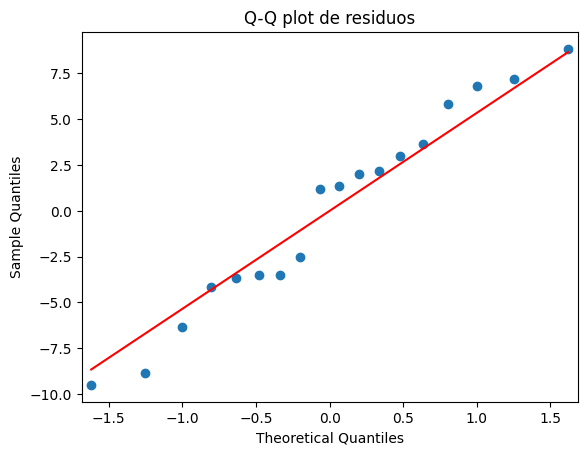

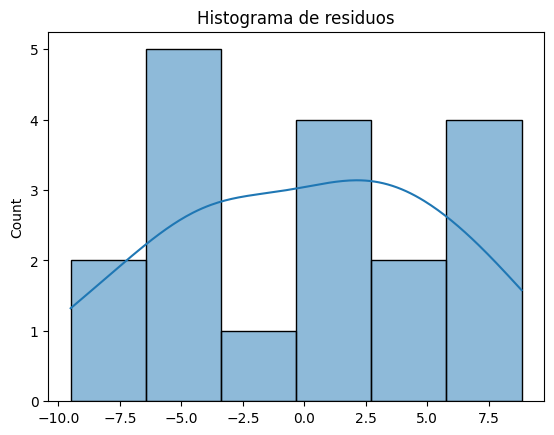

In [3]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [4]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['marca'] == 1]['moscas']
grupo2 = df[df['marca'] == 2]['moscas']
grupo3 = df[df['marca'] == 3]['moscas']


stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.5999140287120529


 Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -9.8333 0.0808 -14.6661 -5.0006   True
     1      3  -6.1667 0.3341 -10.9994 -1.3339   True
     2      3   3.6667 0.6655  -1.1661  8.4994  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

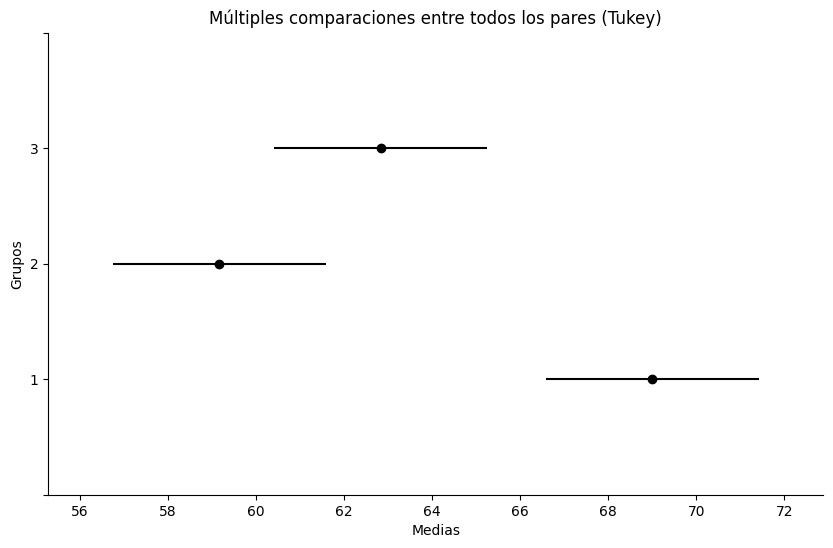

In [5]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['moscas'], groups=df['marca'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Debido a que Tukey ignora las variables de bloqueo las marcas muestran diferencia en la tabla ANOVA por lo tanto no se confia en Tukey

In [6]:
#no existe diferencia significativa entre las marcas y si existen los supuestos


##Problema 2:
En una empresa lechera se tienen varios silos para almacenar leche (cisternas de 60 000 L). Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. Se sospecha que en algunos silos hay problemas, por ello, durante cinco días se decide registrar la temperatura a cierta hora crítica. Obviamente la temperatura de un día a otro es una fuente de variabilidad que podría impactar la variabilidad total.

| Silo | Lunes | Martes | Miércoles | Jueves | Viernes |
|------|-------|--------|-----------|--------|---------|
| A    | 4.0   | 4.0    | 5.0       | 0.5    | 3.0     |
| B    | 5.0   | 6.0    | 2.0       | 4.0    | 4.0     |
| C    | 4.5   | 4.0    | 3.5       | 2.0    | 3.0     |
| D    | 2.5   | 4.0    | 6.5       | 4.5    | 4.0     |
| E    | 4.0   | 4.0    | 3.5       | 2.0    | 4.0     |

**Preguntas:**<br>
a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?  
b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
c) ¿Hay diferencia entre los silos?  
d) ¿La temperatura de un día a otro es diferente?  
e) Revise residuos, ¿hay algún problema evidente?


In [7]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

data = '''
silo,dias,temperatura
A,Lunes,4.0
A,Martes,4.0
A,Miercoles,5.0
A,Jueves,0.5
A,Viernes,3.0
B,Lunes,5.0
B,Martes,6.0
B,Miercoles,2.0
B,Jueves,4.0
B,Viernes,4.0
C,Lunes,4.5
C,Martes,4.0
C,Miercoles,3.5
C,Jueves,2.0
C,Viernes,3.0
D,Lunes,2.5
D,Martes,4.0
D,Miercoles,6.5
D,Jueves,4.5
D,Viernes,4.0
E,Lunes,4.0
E,Martes,4.0
E,Miercoles,3.5
E,Jueves,2.0
E,Viernes,4.0
'''

df = pd.read_csv(StringIO(data))
df

,silo,dias,temperatura
0,A,Lunes,4.0
1,A,Martes,4.0
2,A,Miercoles,5.0
3,A,Jueves,0.5
4,A,Viernes,3.0
5,B,Lunes,5.0
6,B,Martes,6.0
7,B,Miercoles,2.0
8,B,Jueves,4.0
9,B,Viernes,4.0


In [8]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'temperatura ~ C(silo) + C(dias)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

#NO se reachaza la hipótesis nula

,sum_sq,df,F,PR(>F)
C(silo),4.46,4.0,0.690402,0.609212
C(dias),9.76,4.0,1.510836,0.246022
Residual,25.84,16.0,NaN,NaN


valor-p (Shapiro) = 0.1527850137871632


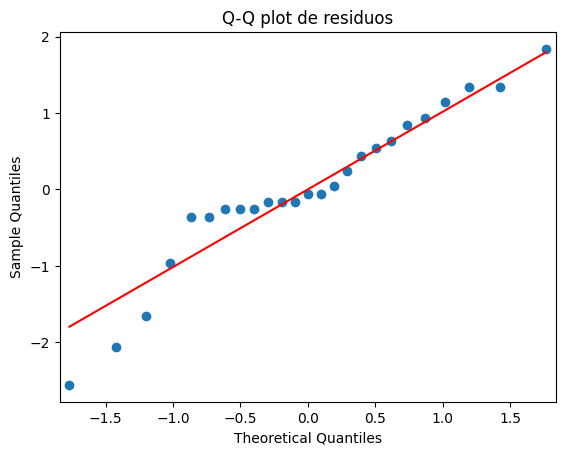

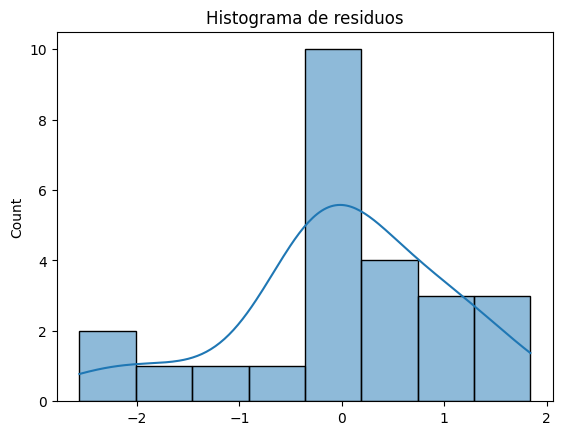

In [9]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [10]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['silo'] == 'A']['temperatura']
grupo2 = df[df['silo'] == 'B']['temperatura']
grupo3 = df[df['silo'] == 'C']['temperatura']
grupo4 = df[df['silo'] == 'D']['temperatura']
grupo5 = df[df['silo'] == 'E']['temperatura']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.8915311038595306


Multiple Comparison of Means - Tukey HSD, FWER=0.50
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B      0.9 0.8211 -0.4705 2.2705  False
     A      C      0.1    1.0 -1.2705 1.4705  False
     A      D      1.0 0.7596 -0.3705 2.3705  False
     A      E      0.2 0.9992 -1.1705 1.5705  False
     B      C     -0.8 0.8745 -2.1705 0.5705  False
     B      D      0.1    1.0 -1.2705 1.4705  False
     B      E     -0.7 0.9183 -2.0705 0.6705  False
     C      D      0.9 0.8211 -0.4705 2.2705  False
     C      E      0.1    1.0 -1.2705 1.4705  False
     D      E     -0.8 0.8745 -2.1705 0.5705  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

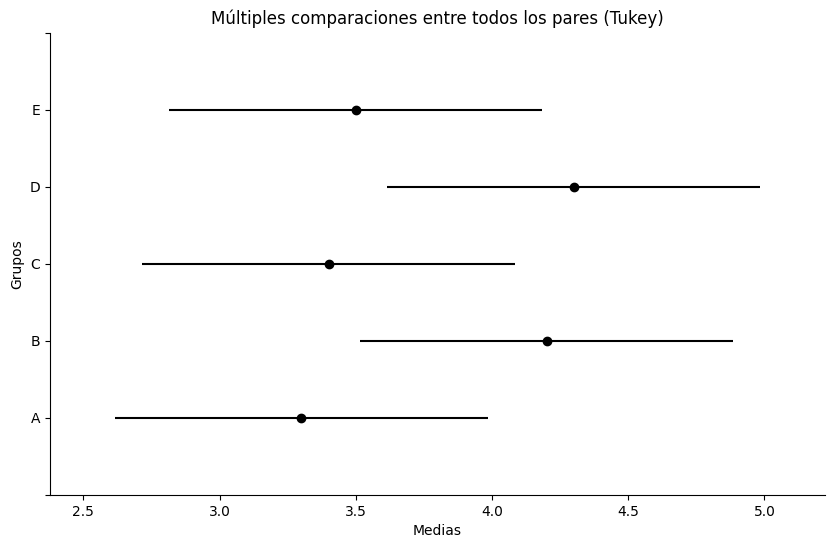

In [11]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['temperatura'], groups=df['silo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

## Problema 3
Se diseñó un experimento para estudiar el rendimiento de cuatro detergentes. Las siguientes lecturas de “blancura” se obtuvieron con un equipo especial diseñado para 12 cargas de lavado, distribuidas en tres modelos de lavadoras:

| Detergente | Lavadora 1 | Lavadora 2 | Lavadora 3 |
|------------|------------|------------|------------|
| A          | 45         | 43         | 51         |
| B          | 47         | 44         | 52         |
| C          | 50         | 49         | 57         |
| D          | 42         | 37         | 49         |

**Preguntas:**<br>
a) Señale el nombre del diseño experimental utilizado.  
b) Formule la hipótesis que se quiere probar en este problema.  
c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.  



In [12]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

data = '''
detergente,lavadora,blancura
A,1,45
A,2,43
A,3,51
B,1,47
B,2,44
B,3,52
C,1,50
C,2,49
C,3,57
D,1,42
D,2,37
D,3,49
'''

df = pd.read_csv(StringIO(data))
df

,detergente,lavadora,blancura
0,A,1,45
1,A,2,43
2,A,3,51
3,B,1,47
4,B,2,44
5,B,3,52
6,C,1,50
7,C,2,49
8,C,3,57
9,D,1,42


In [13]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'blancura ~ C(detergente) + C(lavadora)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

#NO se reachaza la hipótesis nula

,sum_sq,df,F,PR(>F)
C(detergente),133.666667,3.0,34.127660,0.000363
C(lavadora),170.166667,2.0,65.170213,0.000085
Residual,7.833333,6.0,NaN,NaN


valor-p (Shapiro) = 0.8945576994890372


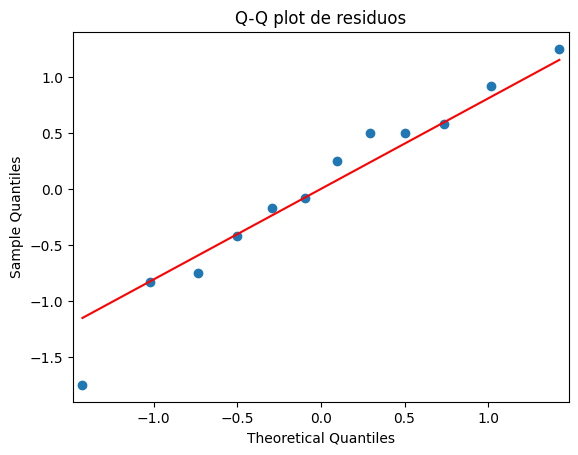

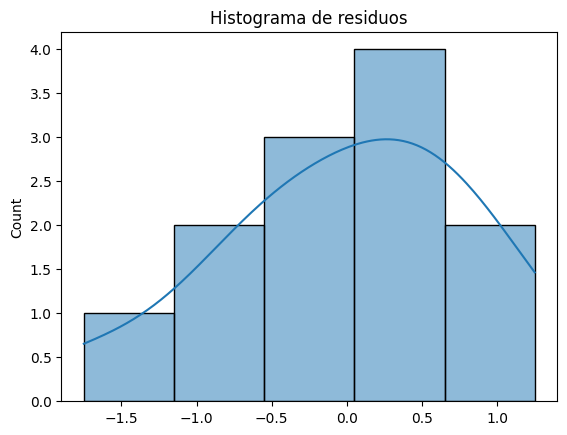

In [14]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [15]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['detergente'] == 'A']['blancura']
grupo2 = df[df['detergente'] == 'B']['blancura']
grupo3 = df[df['detergente'] == 'C']['blancura']
grupo4 = df[df['detergente'] == 'D']['blancura']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.9432760038375858


 Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   1.3333 0.9847  -4.2963   6.963  False
     A      C   5.6667  0.495    0.037 11.2963   True
     A      D  -3.6667  0.779  -9.2963   1.963  False
     B      C   4.3333 0.6855  -1.2963   9.963  False
     B      D     -5.0 0.5887 -10.6296  0.6296  False
     C      D  -9.3333 0.1495  -14.963 -3.7037   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

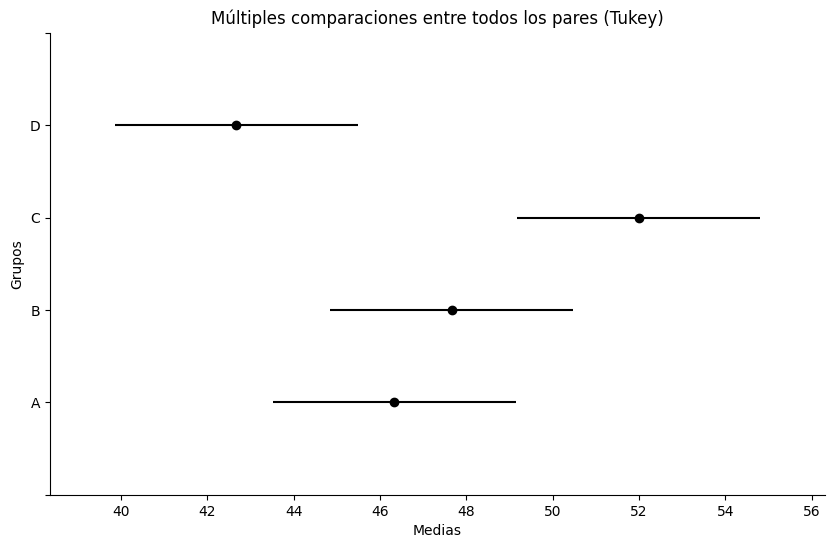

In [16]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['blancura'], groups=df['detergente'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

## Problema 4
Con respecto al problema anterior:<br>
a) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.  
b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.  
c) ¿Con cuáles conclusiones se queda? Explique su respuesta.

In [17]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

data = '''
detergente,blancura
A,45
A,43
A,51
B,47
B,44
B,52
C,50
C,49
C,57
D,42
D,37
D,49
'''

df = pd.read_csv(StringIO(data))
df

,detergente,blancura
0,A,45
1,A,43
2,A,51
3,B,47
4,B,44
5,B,52
6,C,50
7,C,49
8,C,57
9,D,42


In [18]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'blancura ~ C(detergente)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(detergente),133.666667,3.0,2.002497,0.19229
Residual,178.000000,8.0,NaN,NaN


valor-p (Shapiro) = 0.14533139517179772


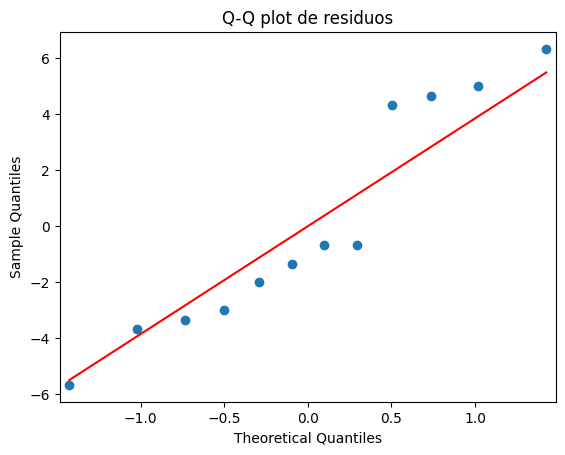

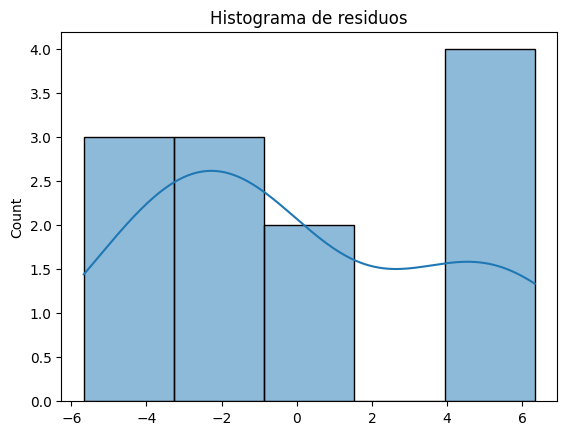

In [19]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [20]:
#Mily Díaz de León Márquez
from scipy.stats import levene

grupo1 = df[df['detergente'] == 'A']['blancura']
grupo2 = df[df['detergente'] == 'B']['blancura']
grupo3 = df[df['detergente'] == 'C']['blancura']
grupo4 = df[df['detergente'] == 'D']['blancura']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.9432760038375858


 Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   1.3333 0.9847  -4.2963   6.963  False
     A      C   5.6667  0.495    0.037 11.2963   True
     A      D  -3.6667  0.779  -9.2963   1.963  False
     B      C   4.3333 0.6855  -1.2963   9.963  False
     B      D     -5.0 0.5887 -10.6296  0.6296  False
     C      D  -9.3333 0.1495  -14.963 -3.7037   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

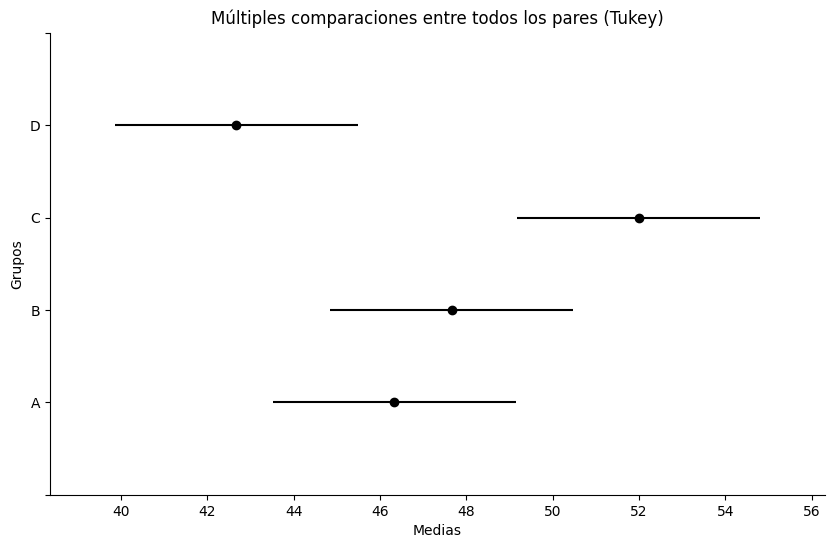

In [21]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['blancura'], groups=df['detergente'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#En ambos problemas, el detergente no resulta significativo.
#Al quitar la lavadora, el modelo pierde capacidad explicativa, pero las conclusiones respecto al detergente se mantienen iguales.

## Problema 5
Una de las variables críticas en el proceso de ensamble del brazo lector de un disco duro es el ángulo que este forma con el cuerpo principal de la cabeza lectora. Se corre un experimento con el objetivo de comparar dos equipos que miden dicho ángulo en unidades de radianes. Se decide utilizar como factor de bloque a los operadores de los equipos. Los resultados se muestran en la siguiente tabla:

| Operador | Equipo 1                                         | Equipo 2                                         |
|----------|--------------------------------------------------|--------------------------------------------------|
| 1        | 1.328, 0.985, 1.316, 1.553, 1.310               | 1.273, 0.985, 1.134, 1.412, 0.917               |
|          | 1.113, 1.057, 1.144, 1.485, 1.386               | 0.789, 0.671, 0.554, 1.386, 1.289               |
| 2        | 1.269, 1.268, 1.091, 1.195, 1.380               | 1.036, 0.783, 1.108, 1.129, 1.132               |
|          | 1.093, 0.984, 1.087, 1.482, 1.442               | 0.201, 0.900, 0.916, 1.434, 1.223               |
| 3        | 1.440, 1.079, 1.389, 1.611, 1.445               | 1.454, 1.063, 1.219, 1.602, 1.583               |
|          | 1.150, 1.190, 1.247, 1.617, 1.574               | 1.018, 1.050, 0.997, 1.538, 1.478               |

### Preguntas y ejercicios:
a) Plantee el modelo y las hipótesis más adecuadas al problema.  
b) ¿Existen diferencias entre los equipos? Argumente estadísticamente.  
c) ¿Existen diferencias entre los operadores?  
d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.  
e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.


In [22]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

data = '''
equipo,operador,resultado
1,1,1.328
1,1,0.985
1,1,1.316
1,1,1.553
1,1,1.310
1,1,1.113
1,1,1.057
1,1,1.144
1,1,1.485
1,1,1.386
2,1,1.273
2,1,0.985
2,1,1.134
2,1,1.412
2,1,0.917
2,1,0.789
2,1,0.671
2,1,0.554
2,1,1.386
2,1,1.289
1,2,1.269
1,2,1.268
1,2,1.091
1,2,1.195
1,2,1.380
1,2,1.093
1,2,0.984
1,2,1.087
1,2,1.482
1,2,1.442
2,2,1.036
2,2,0.783
2,2,1.108
2,2,1.129
2,2,1.132
2,2,0.201
2,2,0.900
2,2,0.916
2,2,1.434
2,2,1.223
1,3,1.440
1,3,1.079
1,3,1.389
1,3,1.611
1,3,1.445
1,3,1.150
1,3,1.190
1,3,1.247
1,3,1.617
1,3,1.574
2,3,1.454
2,3,1.063
2,3,1.219
2,3,1.602
2,3,1.583
2,3,1.018
2,3,1.050
2,3,0.997
2,3,1.538
2,3,1.478
'''

df = pd.read_csv(StringIO(data))
df

,equipo,operador,resultado
0,1,1,1.328
1,1,1,0.985
2,1,1,1.316
3,1,1,1.553
4,1,1,1.310
5,1,1,1.113
6,1,1,1.057
7,1,1,1.144
8,1,1,1.485
9,1,1,1.386


In [23]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'resultado ~ C(equipo) + C(operador)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

#NO se reachaza la hipótesis nula

,sum_sq,df,F,PR(>F)
C(equipo),0.492502,1.0,8.089543,0.006205
C(operador),0.588721,2.0,4.834997,0.011561
Residual,3.409351,56.0,NaN,NaN


valor-p (Shapiro) = 0.05501647805168455


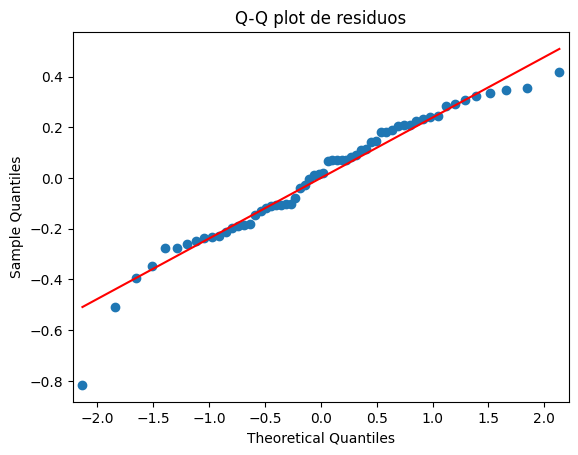

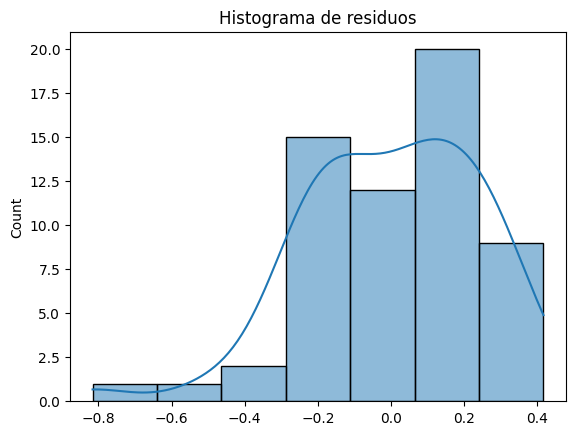

In [24]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [25]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['equipo'] == 1]['resultado']
grupo2 = df[df['equipo'] == 2]['resultado']


stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.04685739874241189


Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.1812 0.0097 -0.2272 -0.1352   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

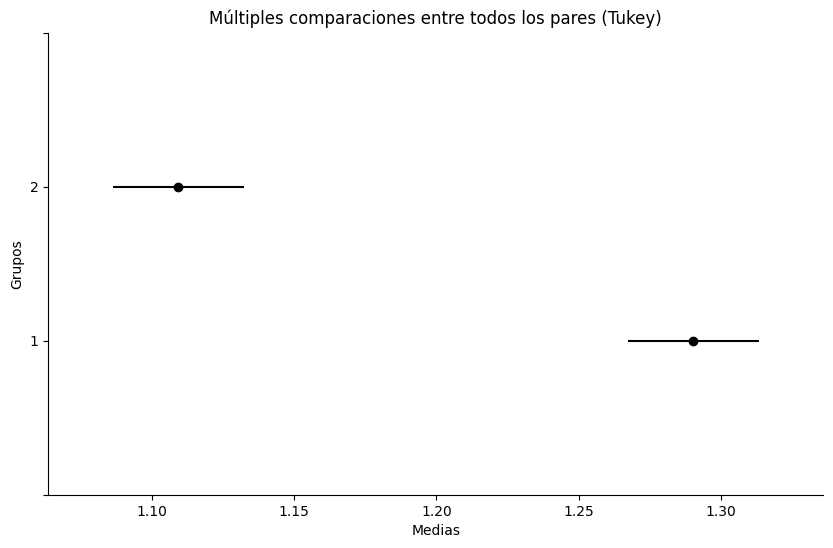

In [26]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['resultado'], groups=df['equipo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Lambda óptimo: 1.8779222848260797


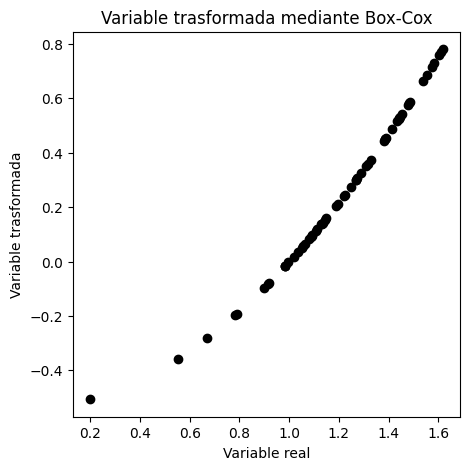

In [27]:
#Mily Díaz de León Márquez
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["resultado_boxcox"], lambda_opt = boxcox(df["resultado"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["resultado"], df["resultado_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [28]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

#Y ~ X
modelo_lineal = ols("resultado_boxcox~C(equipo) + C(operador)",data=df).fit()
tabla_anova= sm.stats.anova_lm(modelo_lineal)
tabla_anova

#Se rechaza hipotesis nula, si hay relacion entre variables

,df,sum_sq,mean_sq,F,PR(>F)
C(equipo),1.0,0.507174,0.507174,7.169540,0.009712
C(operador),2.0,0.764988,0.382494,5.407025,0.007128
Residual,56.0,3.961450,0.070740,NaN,NaN


valor-p (Shapiro) = 0.1401259378491958


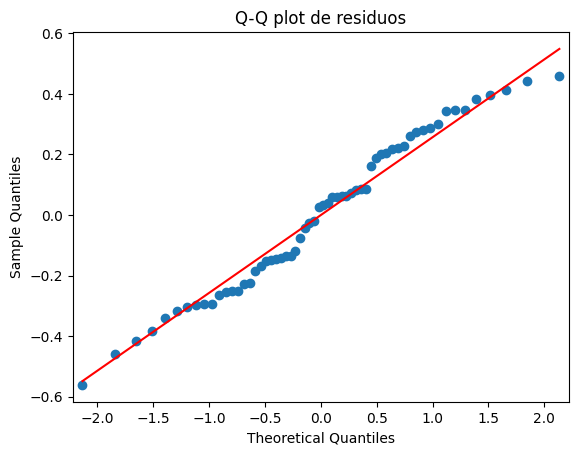

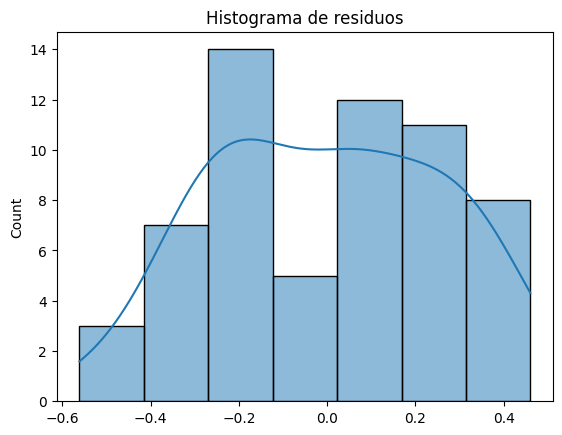

In [29]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [30]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['equipo'] == 1]['resultado_boxcox']
grupo2 = df[df['equipo'] == 2]['resultado_boxcox']


stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.17035730871570146


Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.1839 0.0155 -0.2339 -0.1339   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

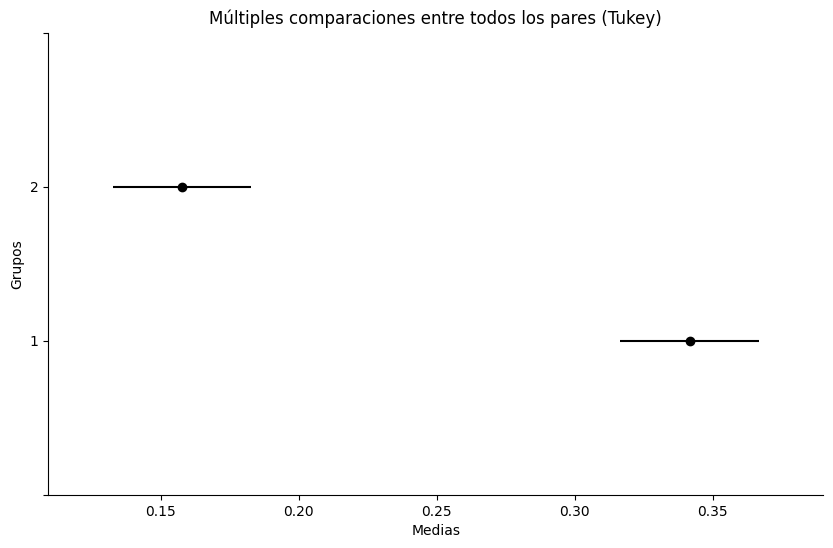

In [31]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['resultado_boxcox'], groups=df['equipo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

## Problema 6
Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. De manera tradicional se han usado termómetros de mercurio (Mer) para verificar que la temperatura sea la adecuada, pero ahora se han comprado termómetros electrónicos (Rtd) para facilitar el proceso de medición. Sin embargo, se duda de las mediciones de estos nuevos dispositivos. Para aclarar dudas y diagnosticar la situación, durante cinco días se toman mediciones con ambos tipos de termómetros en varios silos (a la misma hora). Los datos para cinco silos se muestran a continuación:

| Silo | Día 1 (Mer) | Día 1 (Rtd) | Día 2 (Mer) | Día 2 (Rtd) | Día 3 (Mer) | Día 3 (Rtd) | Día 4 (Mer) | Día 4 (Rtd) | Día 5 (Mer) | Día 5 (Rtd) |
|------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|--|
| A    | 4.0         | 2.6         | 4.0         | 2.8         | 5.0         | 5.0         | 0.5         | 0.0         | 3.0         | 2.4         |
| B    | 5.0         | 6.4         | 6.0         | 6.4         | 2.0         | 2.3         | 4.0         | 4.2         | 4.0         | 4.0         |
| C    | 4.5         | 3.3         | 4.0         | 1.4         | 3.5         | 1.8         | 2.0         | -1.9        | 3.0         | -7.6        |
| D    | 2.5         | 3.1         | 4.0         | 5.0         | 6.5         | 6.6         | 4.5         | 2.7         | 4.0         | 4.0         |
| E    | 4.0         | 0.0         | 4.0         | 3.5         | 0.6         | 2.0         | -4.0        | -4.0        | -4.0        | -6.3        |

**Preguntas:**<br>
a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).  
b) Es claro que el silo se puede ver como tratamiento y día como bloque. Considere sólo los datos de Rtd y establezca el modelo estadístico. También haga el ANOVA correspondiente y obtenga conclusiones.  
c) Repita el inciso anterior pero ahora para las mediciones Mer.  
d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.  
e) Datos pareados. Para comparar los dos métodos de medición (Mer y Rtd) obtenga como variable de respuesta la diferencia de temperatura que registran los métodos para cada día en cada silo. Considerando esto, establezca el modelo estadístico, haga el ANOVA correspondiente y obtenga conclusiones.


In [32]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

data = '''
silo,dia,termometro,temperatura
A,1,Mer,4.0
A,1,Rtd,2.6
A,2,Mer,4.0
A,2,Rtd,2.8
A,3,Mer,5.0
A,3,Rtd,5.0
A,4,Mer,0.5
A,4,Rtd,0.0
A,5,Mer,3.0
A,5,Rtd,2.4
B,1,Mer,5.0
B,1,Rtd,6.4
B,2,Mer,6.0
B,2,Rtd,6.4
B,3,Mer,2.0
B,3,Rtd,2.3
B,4,Mer,4.0
B,4,Rtd,4.2
B,5,Mer,4.0
B,5,Rtd,4.0
C,1,Mer,4.5
C,1,Rtd,3.3
C,2,Mer,4.0
C,2,Rtd,1.4
C,3,Mer,3.5
C,3,Rtd,1.8
C,4,Mer,2.0
C,4,Rtd,-1.9
C,5,Mer,3.0
C,5,Rtd,-7.6
D,1,Mer,2.5
D,1,Rtd,3.1
D,2,Mer,4.0
D,2,Rtd,5.0
D,3,Mer,6.5
D,3,Rtd,6.6
D,4,Mer,4.5
D,4,Rtd,2.7
D,5,Mer,4.0
D,5,Rtd,4.0
E,1,Mer,4.0
E,1,Rtd,0.0
E,2,Mer,4.0
E,2,Rtd,3.5
E,3,Mer,0.6
E,3,Rtd,2.0
E,4,Mer,-4.0
E,4,Rtd,-4.0
E,5,Mer,-4.0
E,5,Rtd,-6.3
'''

df = pd.read_csv(StringIO(data))
df

,silo,dia,termometro,temperatura
0,A,1,Mer,4.0
1,A,1,Rtd,2.6
2,A,2,Mer,4.0
3,A,2,Rtd,2.8
4,A,3,Mer,5.0
5,A,3,Rtd,5.0
6,A,4,Mer,0.5
7,A,4,Rtd,0.0
8,A,5,Mer,3.0
9,A,5,Rtd,2.4


In [33]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'temperatura ~ C(silo) + C(termometro) + C(dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova

#NO se reachaza la hipótesis nula

,sum_sq,df,F,PR(>F)
Intercept,100.44162,1.0,20.654505,0.000050
C(silo),168.46920,4.0,8.660872,0.000039
C(termometro),14.47220,1.0,2.976019,0.092227
C(dia),110.43720,4.0,5.677491,0.001025
Residual,194.51760,40.0,NaN,NaN


valor-p (Shapiro) = 0.016256282483184132


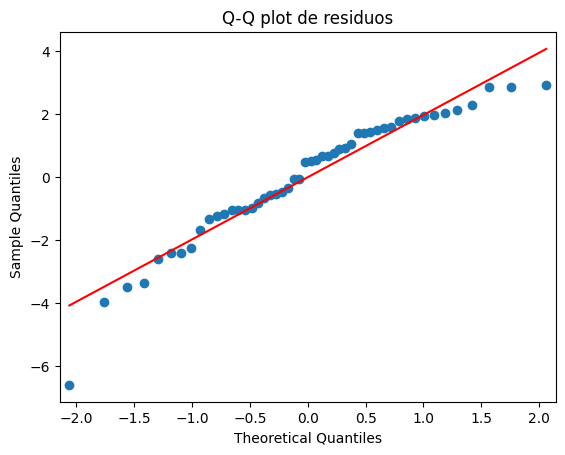

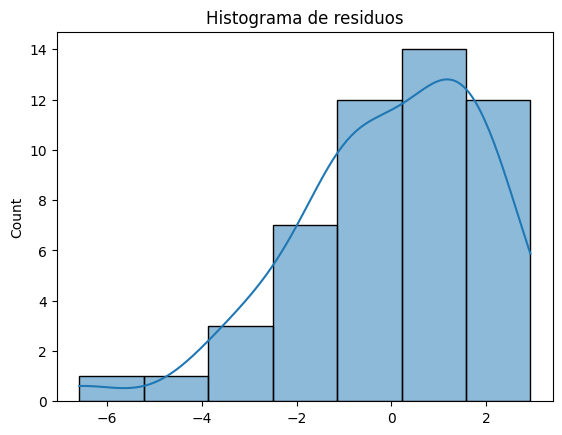

In [34]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [35]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['termometro'] == "Mer"]['temperatura']
grupo2 = df[df['termometro'] == "Rtd"]['temperatura']


stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.1935998956836298


Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Mer    Rtd   -1.076 0.2317 -1.6797 -0.4723   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

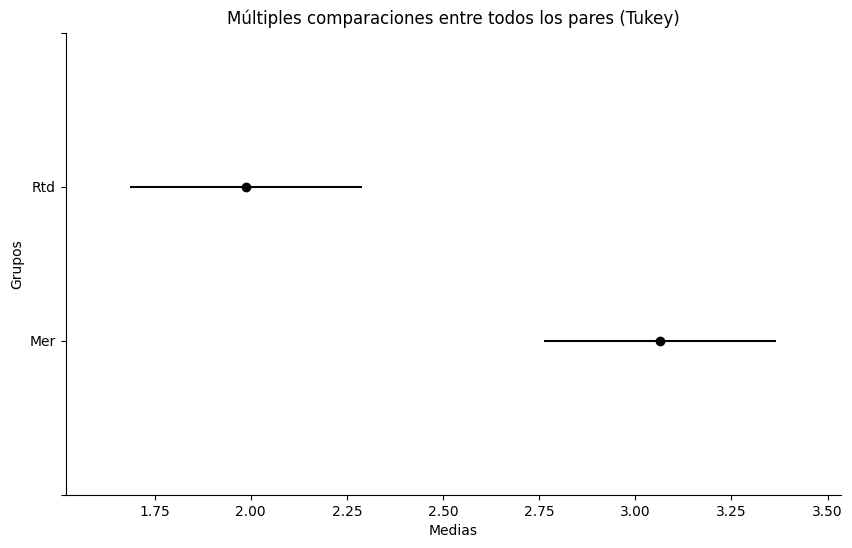

In [36]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['temperatura'], groups=df['termometro'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Lambda óptimo: 2.6132138268348113


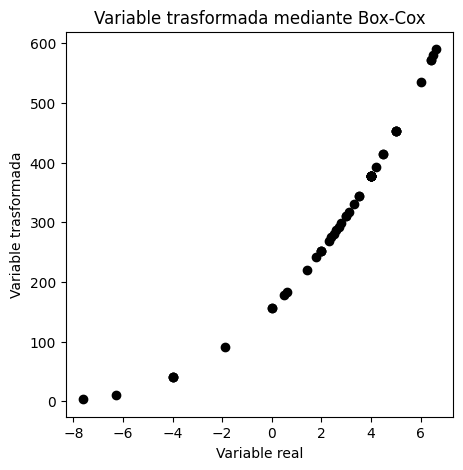

In [37]:
#Mily Díaz de León Márquez
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["temperatura_boxcox"], lambda_opt = boxcox(df["temperatura"]+10)
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["temperatura"], df["temperatura_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [38]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'temperatura_boxcox ~ C(silo) + C(termometro) + C(dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova

#NO se reachaza la hipótesis nula

,sum_sq,df,F,PR(>F)
Intercept,716441.311220,1.0,70.405872,2.352593e-10
C(silo),396722.321209,4.0,9.746640,1.337930e-05
C(termometro),22941.764784,1.0,2.254525,1.410779e-01
C(dia),231298.601073,4.0,5.682524,1.018531e-03
Residual,407034.977783,40.0,NaN,NaN


valor-p (Shapiro) = 0.2728106709161501


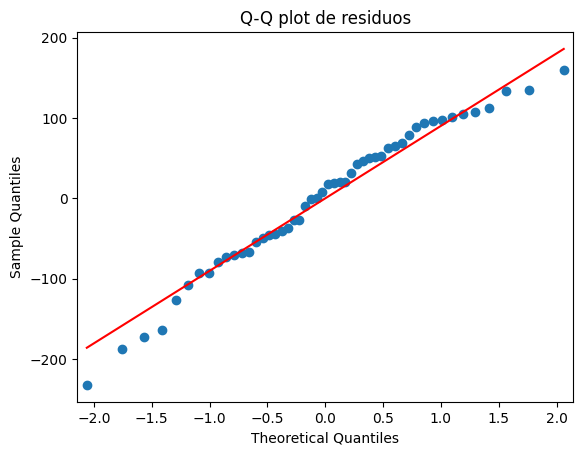

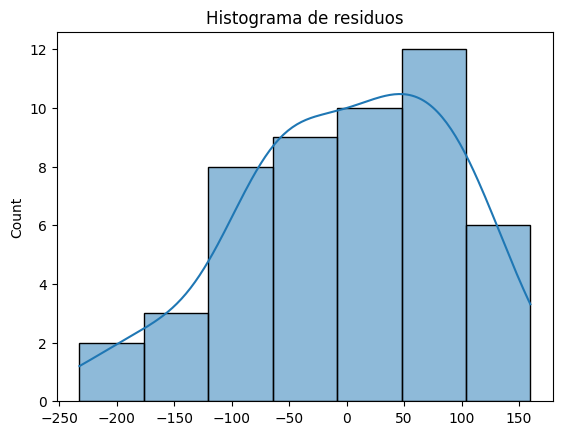

In [39]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [40]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['termometro'] == "Mer"]['temperatura_boxcox']
grupo2 = df[df['termometro'] == "Rtd"]['temperatura_boxcox']


stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.22049785564053534


 Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper   reject
-----------------------------------------------------
   Mer    Rtd -42.8409 0.3075 -71.069 -14.6127   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

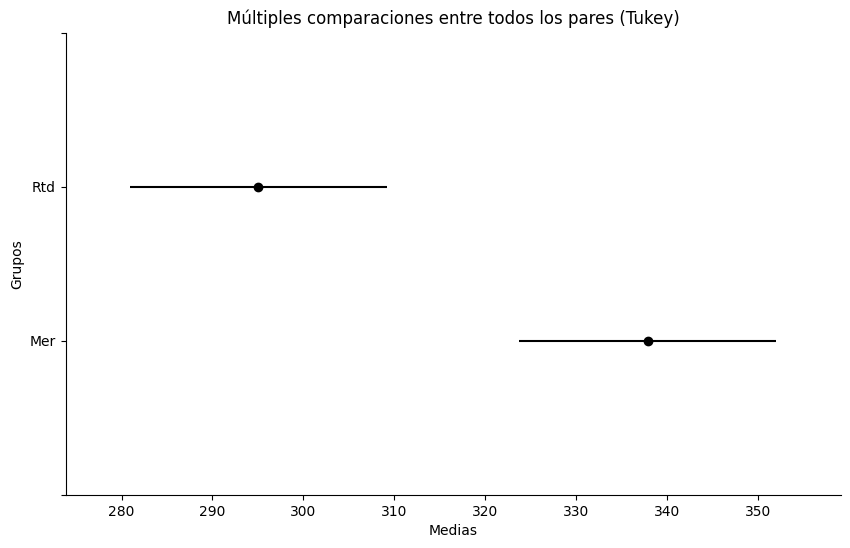

In [41]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['temperatura_boxcox'], groups=df['termometro'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

**Variable de respuesta:** Temperatura

**Factor:** Termometro

**Variables de bloqueo:** Silo, dia

* Valor-p ANOVA:
Silo: 0.000039, hay diferencia significativa entre los silos.
Día: 0.001, hay diferencia significativa entre los dias.
Termómetro: 0.092227, no hay diferencia significativa entre los termómetros.

**Los termómetros funcionan diferente, pero no ha**

* Valor-p Shapiro: 0.01625, 0.27, existe normalidad ntre las variables después de realizar boxcox.

* Valor-p Levene: 0.1935, 0.2204, existe homoscedasticidad.


## Problema 7
Se quiere estudiar el efecto de cinco diferentes catalizadores (**A, B, C, D y E**) sobre el **tiempo de reacción** de un proceso químico. Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activamente a los **lotes y días**. Los datos obtenidos son:

| Lote | Día 1 | Día 2 | Día 3 | Día 4 | Día 5 |
|------|-------|-------|-------|-------|-------|
| 1    | A = 8 | B = 7 | D = 1 | C = 7 | E = 3 |
| 2    | C = 11| E = 2 | A = 7 | D = 3 | B = 8 |
| 3    | B = 4 | A = 9 | C = 10| E = 1 | D = 5 |
| 4    | D = 6 | C = 8 | E = 6 | B = 6 | A = 10|
| 5    | E = 4 | D = 2 | B = 3 | A = 8 | C = 8 |


**Preguntas:**<br>
a) ¿Cómo se aleatorizó el experimento?  
b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.  
c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?  
d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?  
e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?  
f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.


In [42]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

data = '''
catalizadores,lote,dia,tiempo
A,1,1,8
B,1,2,7
D,1,3,1
C,1,4,7
E,1,5,3
C,2,1,11
E,2,2,2
A,2,3,7
D,2,4,3
B,2,5,8
B,3,1,4
A,3,2,9
C,3,3,10
E,3,4,1
D,3,5,5
D,4,1,6
C,4,2,8
E,4,3,8
B,4,4,6
A,4,5,10
E,5,1,4
D,5,2,2
B,5,3,3
A,5,4,8
C,5,5,8

'''

df = pd.read_csv(StringIO(data))
df

,catalizadores,lote,dia,tiempo
0,A,1,1,8
1,B,1,2,7
2,D,1,3,1
3,C,1,4,7
4,E,1,5,3
5,C,2,1,11
6,E,2,2,2
7,A,2,3,7
8,D,2,4,3
9,B,2,5,8


In [43]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo_lineal = ols(f'tiempo ~ C(catalizadores) + C(lote) + C(dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(catalizadores),131.36,4.0,8.335025,0.001860
C(lote),21.36,4.0,1.355330,0.306231
C(dia),10.96,4.0,0.695431,0.609448
Residual,47.28,12.0,NaN,NaN


valor-p (Shapiro) = 0.31690751826407704


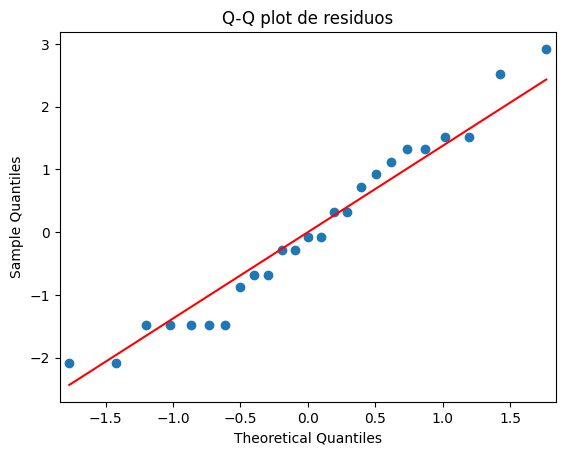

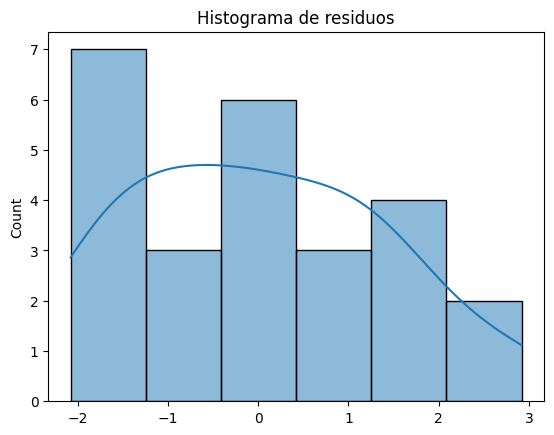

In [44]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [45]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['catalizadores'] == "A"]['tiempo']
grupo2 = df[df['catalizadores'] == "B"]['tiempo']
grupo3 = df[df['catalizadores'] == "C"]['tiempo']
grupo4 = df[df['catalizadores'] == "D"]['tiempo']
grupo5 = df[df['catalizadores'] == "E"]['tiempo']


stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.7643124196676653


Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.2131 -4.8493 -0.7507   True
     A      C      0.4 0.9976 -1.6493  2.4493  False
     A      D     -5.0 0.0061 -7.0493 -2.9507   True
     A      E     -4.8 0.0087 -6.8493 -2.7507   True
     B      C      3.2  0.122  1.1507  5.2493   True
     B      D     -2.2 0.4316 -4.2493 -0.1507   True
     B      E     -2.0 0.5231 -4.0493  0.0493  False
     C      D     -5.4  0.003 -7.4493 -3.3507   True
     C      E     -5.2 0.0043 -7.2493 -3.1507   True
     D      E      0.2 0.9998 -1.8493  2.2493  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

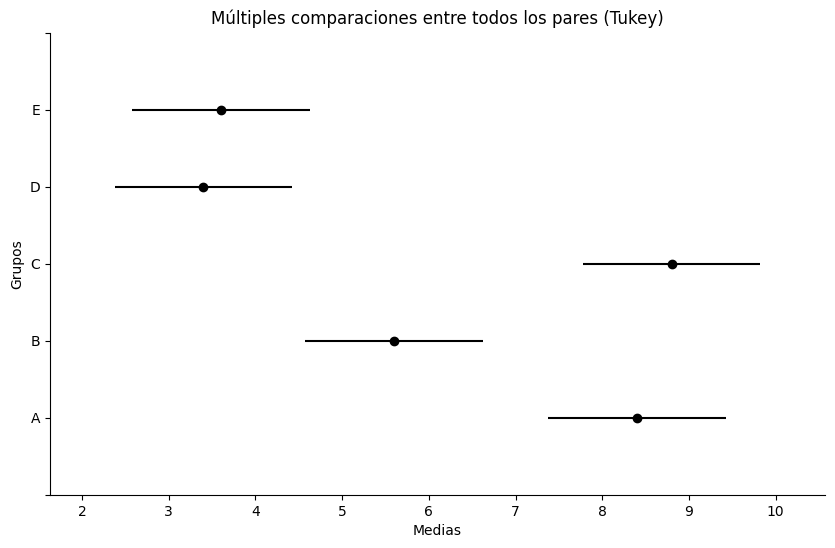

In [46]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['catalizadores'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

## Problema 8
En el problema anterior elimine el factor de bloque días, y conteste:

a) ¿Se justifica la eliminación?  
b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?


In [47]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

data = '''
catalizadores,lote,tiempo
A,1,8
B,1,7
D,1,1
C,1,7
E,1,3
C,2,11
E,2,2
A,2,7
D,2,3
B,2,8
B,3,4
A,3,9
C,3,10
E,3,1
D,3,5
D,4,6
C,4,8
E,4,8
B,4,6
A,4,10
E,5,4
D,5,2
B,5,3
A,5,8
C,5,8

'''

df = pd.read_csv(StringIO(data))
df

,catalizadores,lote,tiempo
0,A,1,8
1,B,1,7
2,D,1,1
3,C,1,7
4,E,1,3
5,C,2,11
6,E,2,2
7,A,2,7
8,D,2,3
9,B,2,8


In [48]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo_lineal = ols(f'tiempo ~ C(catalizadores) + C(lote)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(catalizadores),131.36,4.0,9.021978,0.000519
C(lote),21.36,4.0,1.467033,0.258420
Residual,58.24,16.0,NaN,NaN


valor-p (Shapiro) = 0.2972322813925925


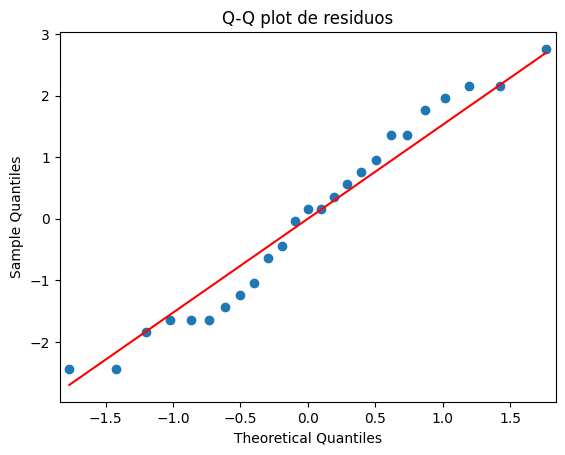

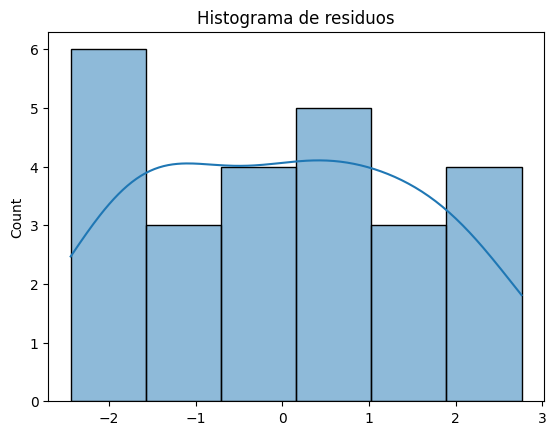

In [49]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [50]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['catalizadores'] == "A"]['tiempo']
grupo2 = df[df['catalizadores'] == "B"]['tiempo']
grupo3 = df[df['catalizadores'] == "C"]['tiempo']
grupo4 = df[df['catalizadores'] == "D"]['tiempo']
grupo5 = df[df['catalizadores'] == "E"]['tiempo']


stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.7643124196676653


Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.2131 -4.8493 -0.7507   True
     A      C      0.4 0.9976 -1.6493  2.4493  False
     A      D     -5.0 0.0061 -7.0493 -2.9507   True
     A      E     -4.8 0.0087 -6.8493 -2.7507   True
     B      C      3.2  0.122  1.1507  5.2493   True
     B      D     -2.2 0.4316 -4.2493 -0.1507   True
     B      E     -2.0 0.5231 -4.0493  0.0493  False
     C      D     -5.4  0.003 -7.4493 -3.3507   True
     C      E     -5.2 0.0043 -7.2493 -3.1507   True
     D      E      0.2 0.9998 -1.8493  2.2493  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

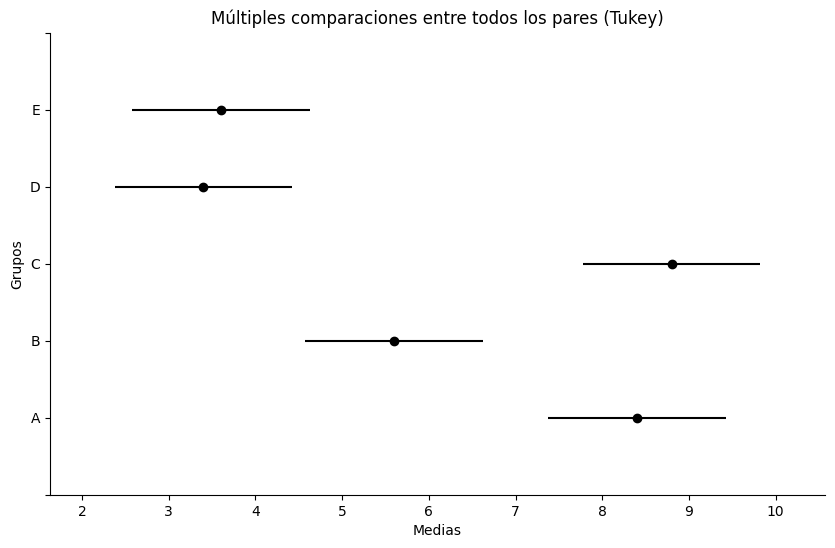

In [51]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['catalizadores'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

## Problema 9
Con respecto a los problemas 7 y 8, además de eliminar el factor día ahora elimine el factor lote, y conteste lo siguiente:

a) ¿Se justifica esta segunda eliminación en ambos problemas?  
b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?  
f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?  


In [52]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

data = '''
catalizadores,tiempo
A,8
B,7
D,1
C,7
E,3
C,11
E,2
A,7
D,3
B,8
B,4
A,9
C,10
E,1
D,5
D,6
C,8
E,8
B,6
A,10
E,4
D,2
B,3
A,8
C,8

'''

df = pd.read_csv(StringIO(data))
df

,catalizadores,tiempo
0,A,8
1,B,7
2,D,1
3,C,7
4,E,3
5,C,11
6,E,2
7,A,7
8,D,3
9,B,8


In [53]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo_lineal = ols(f'tiempo ~ C(catalizadores)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(catalizadores),131.36,4.0,8.251256,0.000423
Residual,79.60,20.0,NaN,NaN


valor-p (Shapiro) = 0.3655789770446113


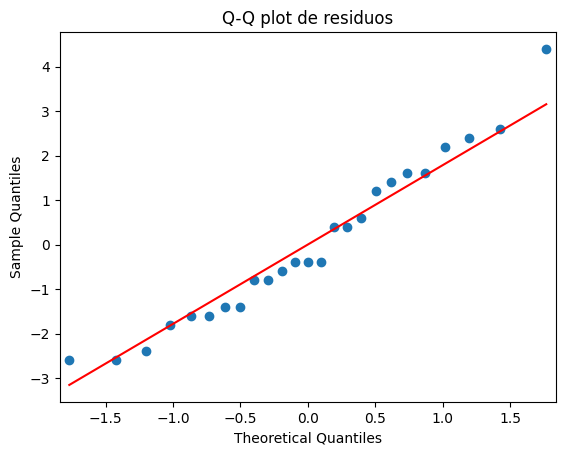

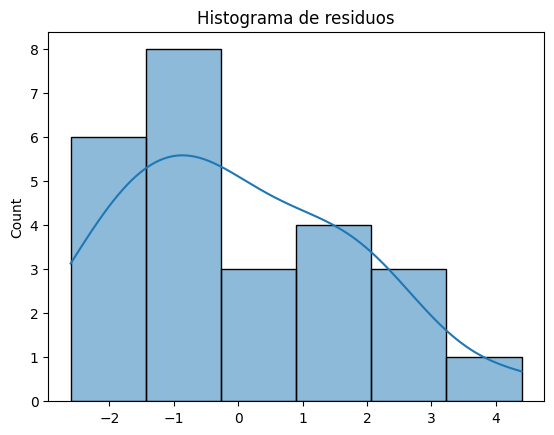

In [54]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [55]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['catalizadores'] == "A"]['tiempo']
grupo2 = df[df['catalizadores'] == "B"]['tiempo']
grupo3 = df[df['catalizadores'] == "C"]['tiempo']
grupo4 = df[df['catalizadores'] == "D"]['tiempo']
grupo5 = df[df['catalizadores'] == "E"]['tiempo']


stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.7643124196676653


Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.2131 -4.8493 -0.7507   True
     A      C      0.4 0.9976 -1.6493  2.4493  False
     A      D     -5.0 0.0061 -7.0493 -2.9507   True
     A      E     -4.8 0.0087 -6.8493 -2.7507   True
     B      C      3.2  0.122  1.1507  5.2493   True
     B      D     -2.2 0.4316 -4.2493 -0.1507   True
     B      E     -2.0 0.5231 -4.0493  0.0493  False
     C      D     -5.4  0.003 -7.4493 -3.3507   True
     C      E     -5.2 0.0043 -7.2493 -3.1507   True
     D      E      0.2 0.9998 -1.8493  2.2493  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

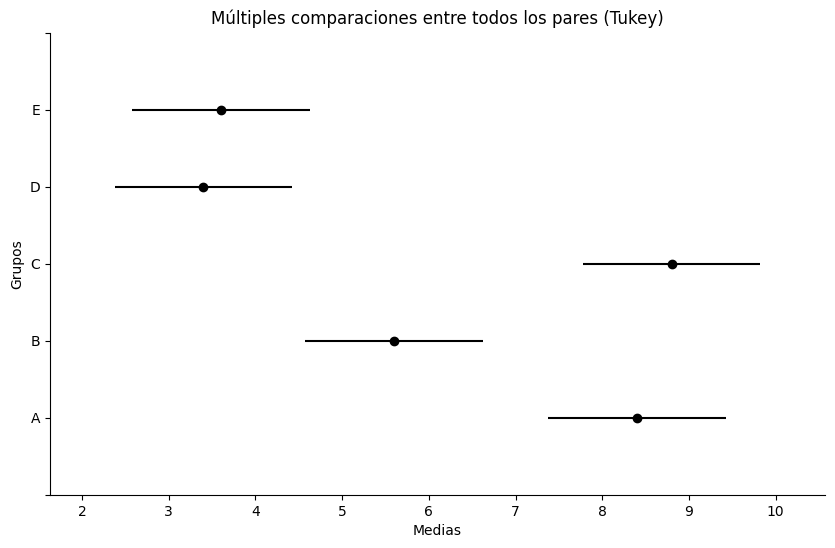

In [56]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['catalizadores'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

## Problema 10
Se comprueba el peso en gramos de un material de tres proveedores: **A, B y C**, por tres diferentes inspectores: **I, II y III**, utilizando tres diferentes escalas: **1, 2 y 3**. El experimento se lleva a cabo como el siguiente cuadro latino:

| Inspector | Escala 1 | Escala 2 | Escala 3 |
|-----------|----------|----------|----------|
| I         | A = 16   | B = 10   | C = 11   |
| II        | B = 15   | C = 9    | A = 14   |
| III       | C = 13   | A = 11   | B = 13   |

**Preguntas:**<br>
a) ¿Hay diferencias entre los proveedores?  
b) ¿Hay diferencias entre los inspectores y entre las escalas?  
c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?  
d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.  


In [57]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

data = '''
proveedores,inspector,escalas,peso
A,I,1,16
B,I,2,10
C,I,3,11
B,II,1,15
C,II,2,9
A,II,3,14
C,III,1,13
A,III,2,11
B,III,3,13
'''

df = pd.read_csv(StringIO(data))
df

,proveedores,inspector,escalas,peso
0,A,I,1,16
1,B,I,2,10
2,C,I,3,11
3,B,II,1,15
4,C,II,2,9
5,A,II,3,14
6,C,III,1,13
7,A,III,2,11
8,B,III,3,13


In [58]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo_lineal = ols(f'peso ~ C(proveedores) + C(escalas) + C(inspector)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(proveedores),10.888889,2.0,49.0,0.020000
C(escalas),32.888889,2.0,148.0,0.006711
C(inspector),0.222222,2.0,1.0,0.500000
Residual,0.222222,2.0,NaN,NaN


valor-p (Shapiro) = 0.00015259147070224657


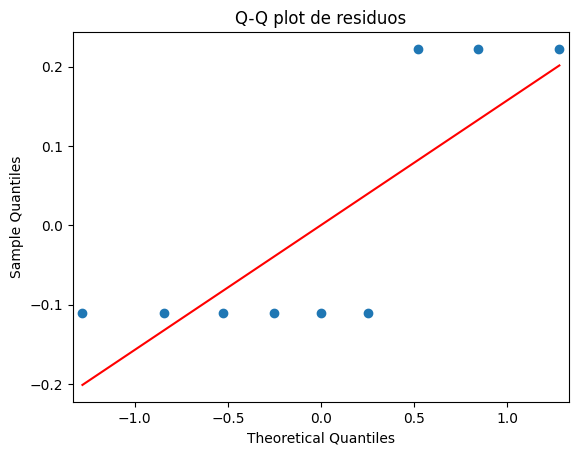

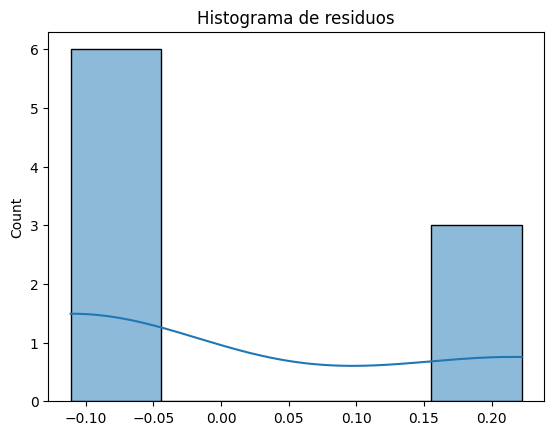

In [59]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [60]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['proveedores'] == 'A']['peso']
grupo2 = df[df['proveedores'] == 'B']['peso']
grupo3 = df[df['proveedores'] == 'C']['peso']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.946440270473328


Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -1.0 0.8649 -3.2923  1.2923  False
     A      C  -2.6667 0.4051 -4.9589 -0.3744   True
     B      C  -1.6667 0.6793 -3.9589  0.6256  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

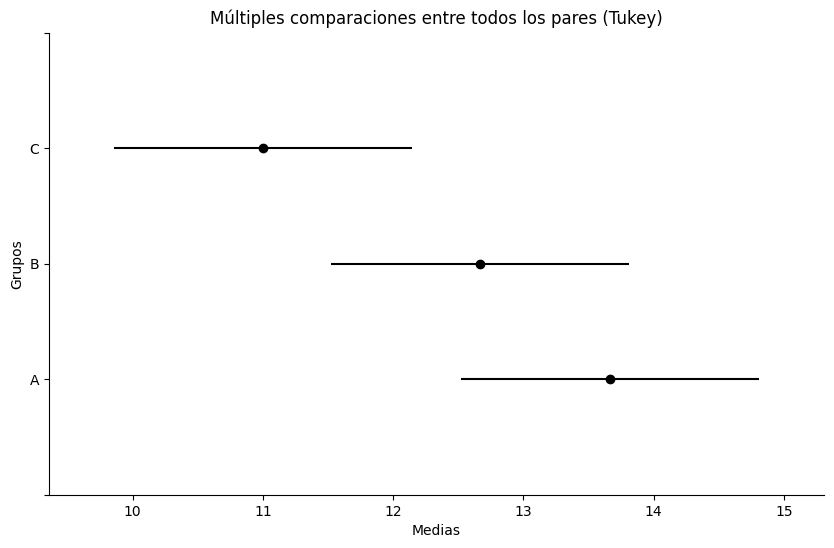

In [61]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['peso'], groups=df['proveedores'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Lambda óptimo: 0.4815596936787171


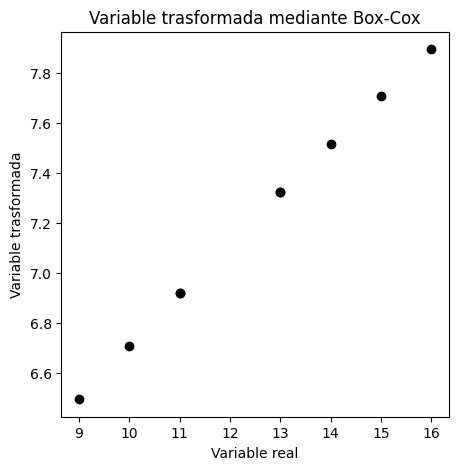

In [62]:
#Mily Díaz de León Márquez
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["peso_boxcox"], lambda_opt = boxcox(df["peso"]+10)
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["peso"], df["peso_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [63]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo_lineal = ols(f'peso_boxcox ~ C(proveedores) + C(escalas) + C(inspector)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(proveedores),0.432114,2.0,71.943231,0.013709
C(escalas),1.316617,2.0,219.205376,0.004541
C(inspector),0.007190,2.0,1.197055,0.455155
Residual,0.006006,2.0,NaN,NaN


valor-p (Shapiro) = 0.00021681604010336338


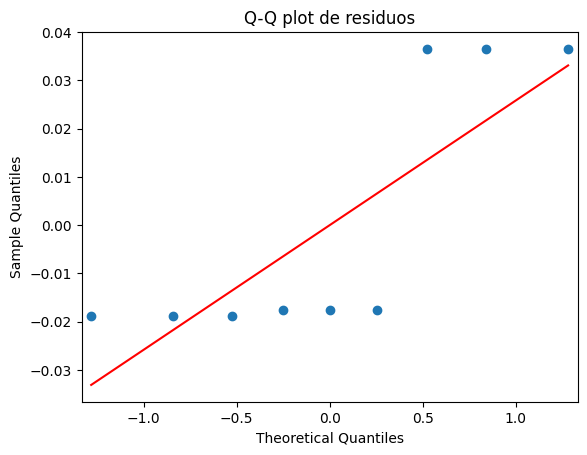

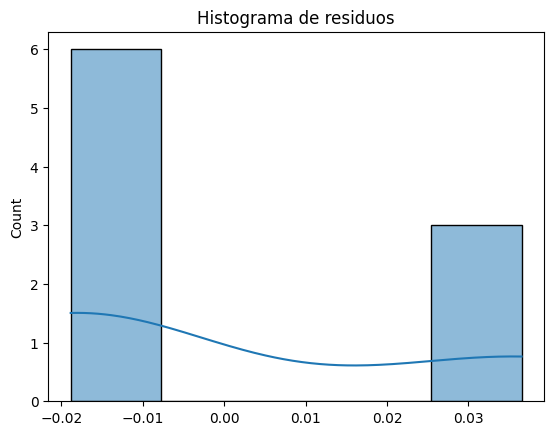

In [64]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [65]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['proveedores'] == 'A']['peso_boxcox']
grupo2 = df[df['proveedores'] == 'B']['peso_boxcox']
grupo3 = df[df['proveedores'] == 'C']['peso_boxcox']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.9655329086803885


Multiple Comparison of Means - Tukey HSD, FWER=0.50
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B  -0.1967 0.8686 -0.6546 0.2612  False
     A      C  -0.5308 0.4072 -0.9887 -0.073   True
     B      C  -0.3341 0.6775  -0.792 0.1237  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

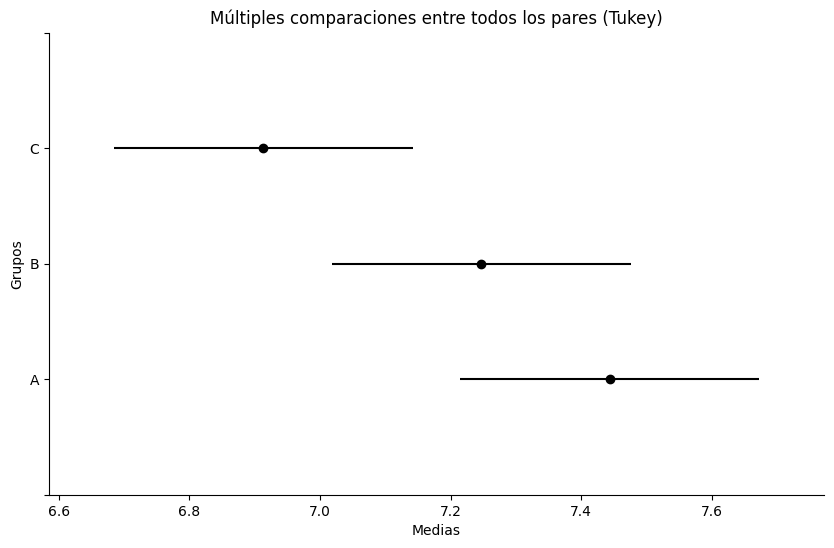

In [66]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['peso_boxcox'], groups=df['proveedores'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

## Problema 11
Cuando se comparan varios fertilizantes o diferentes variedades de cierto cultivo, es típico que se deba considerar el gradiente de fertilidad del suelo (factor columna) o los efectos residuales de cultivos previos (factor renglón). Considerando estos factores de bloque, Gomez y Gomez (1984) plantean un experimento en cuadro latino para comparar, en cuanto a rendimiento en toneladas por hectárea, tres variedades de maíz híbrido (**A, B, C**) y una variedad control (**D**). Para ello, se utiliza un campo agrícola cuadrado de 16 hectáreas, dividido en parcelas de una hectárea. Los datos de rendimiento obtenidos en cada parcela se muestran a continuación:

| Ren\Col | 1       | 2       | 3       | 4       |
|---------|---------|---------|---------|---------|
| 1       | 1.640(B)| 1.210(D)| 1.425(C)| 1.345(A)|
| 2       | 1.475(C)| 1.185(A)| 1.400(D)| 1.290(B)|
| 3       | 1.670(A)| 0.710(C)| 1.665(B)| 1.180(D)|
| 4       | 1.565(D)| 1.290(B)| 1.655(A)| 0.660(C)|

**Preguntas y ejercicios:**<br>
a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?  
b) ¿Cuál de los factores de bloque tuvo efectos?  
c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?  
d) ¿Y con un diseño en bloques completos al azar?  


In [67]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

data = '''
maiz,renglon,columna,rendimiento
B,1,1,1.640
D,1,2,1.210
C,1,3,1.425
A,1,4,1.345
C,2,1,1.475
A,2,2,1.185
D,2,3,1.400
B,2,4,1.290
A,3,1,1.670
C,3,2,0.710
B,3,3,1.665
D,3,4,1.180
D,4,1,1.565
B,4,2,1.290
A,4,3,1.655
C,4,4,0.660
'''

df = pd.read_csv(StringIO(data))
df

,maiz,renglon,columna,rendimiento
0,B,1,1,1.640
1,D,1,2,1.210
2,C,1,3,1.425
3,A,1,4,1.345
4,C,2,1,1.475
5,A,2,2,1.185
6,D,2,3,1.400
7,B,2,4,1.290
8,A,3,1,1.670
9,C,3,2,0.710


In [68]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'rendimiento ~ C(maiz) + C(renglon) + C(columna)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(maiz),0.426842,3.0,6.587865,0.025092
C(renglon),0.030155,3.0,0.465406,0.716972
C(columna),0.827342,3.0,12.769166,0.005148
Residual,0.129584,6.0,NaN,NaN


valor-p (Shapiro) = 0.20260853040992888


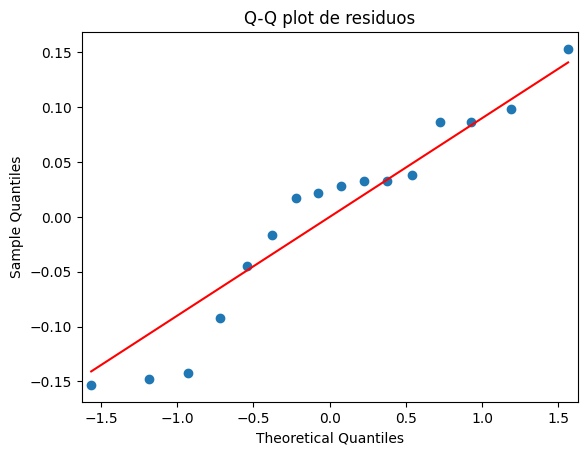

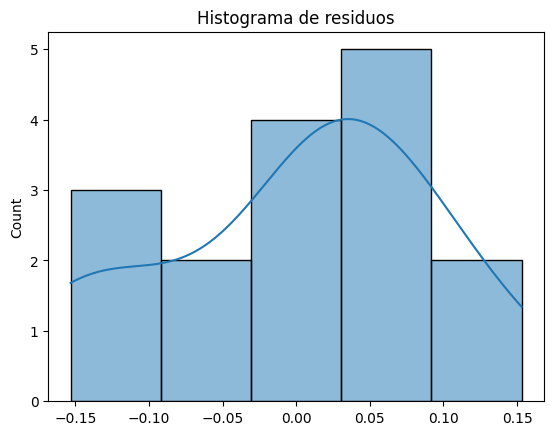

In [69]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [70]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['maiz'] == 'A']['rendimiento']
grupo2 = df[df['maiz'] == 'B']['rendimiento']
grupo3 = df[df['maiz'] == 'C']['rendimiento']
grupo4 = df[df['maiz'] == 'D']['rendimiento']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.00035260549065253474


Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   0.0075    1.0 -0.2846  0.2996  False
     A      C  -0.3962 0.2578 -0.6883 -0.1042   True
     A      D   -0.125 0.9249 -0.4171  0.1671  False
     B      C  -0.4037 0.2444 -0.6958 -0.1117   True
     B      D  -0.1325 0.9124 -0.4246  0.1596  False
     C      D   0.2712 0.5583 -0.0208  0.5633  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

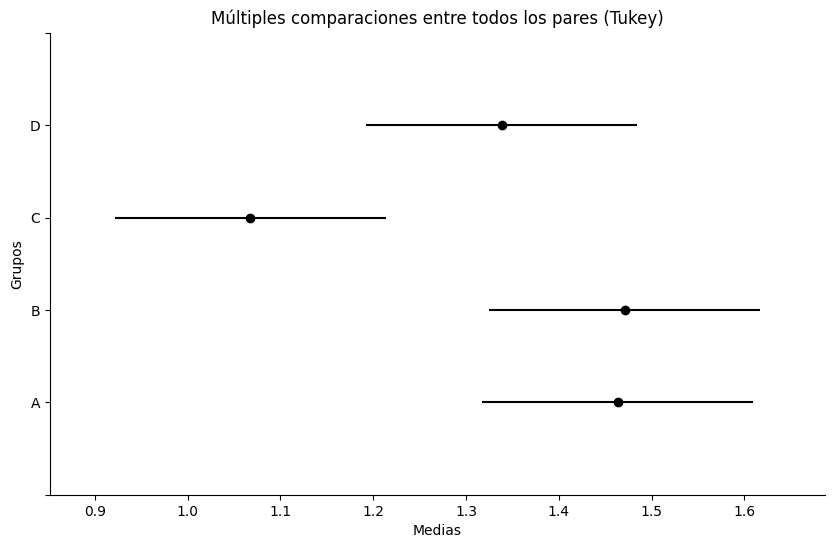

In [71]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['rendimiento'], groups=df['maiz'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Lambda óptimo: 17.89134986900383


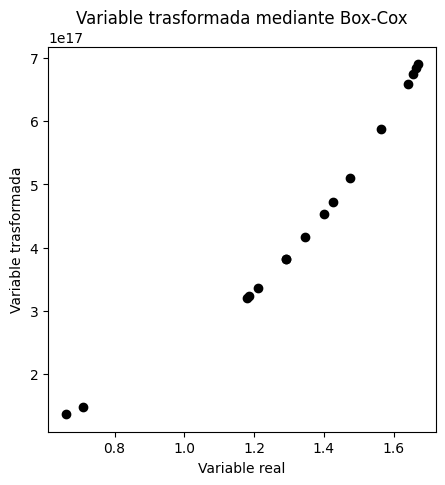

In [72]:
#Mily Díaz de León Márquez
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["rendimiento_boxcox"], lambda_opt = boxcox(df["rendimiento"]+10)
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["rendimiento"], df["rendimiento_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [73]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'rendimiento_boxcox ~ C(maiz) + C(renglon) + C(columna)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(maiz),1.199490e+35,3.0,13.591619,0.004389
C(renglon),6.574489e+33,3.0,0.744966,0.563367
C(columna),3.305922e+35,3.0,37.459941,0.000279
Residual,1.765044e+34,6.0,NaN,NaN


valor-p (Shapiro) = 0.861952934407816


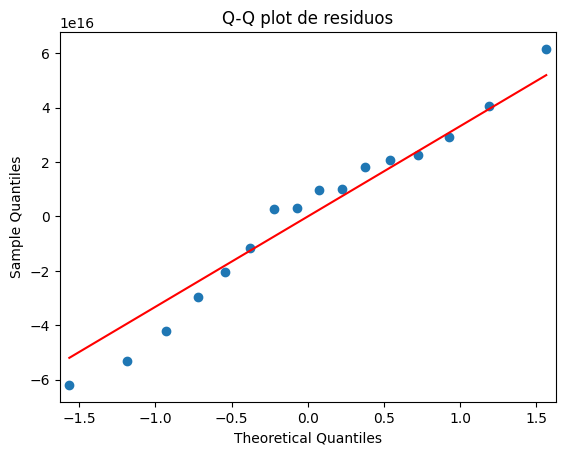

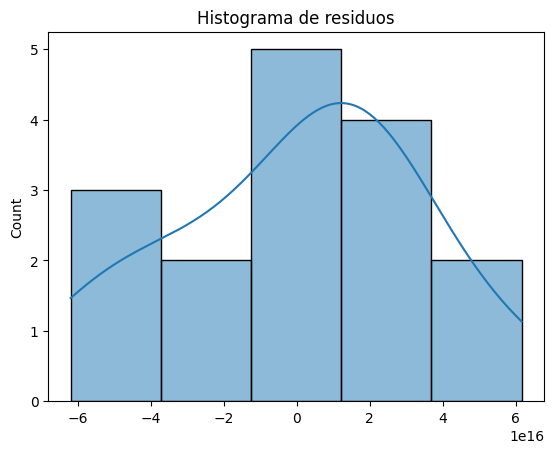

In [74]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [75]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['maiz'] == 'A']['rendimiento_boxcox']
grupo2 = df[df['maiz'] == 'B']['rendimiento_boxcox']
grupo3 = df[df['maiz'] == 'C']['rendimiento_boxcox']
grupo4 = df[df['maiz'] == 'D']['rendimiento_boxcox']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.09249897668198215


                        Multiple Comparison of Means - Tukey HSD, FWER=0.50                        
group1 group2         meandiff        p-adj           lower                   upper          reject
---------------------------------------------------------------------------------------------------
     A      B       863116750394816.0    1.0 -1.7426062184802662e+17  1.7598685534881626e+17  False
     A      C -2.0888880418615782e+17 0.3568 -3.8401254278457926e+17 -3.3765065587736384e+16   True
     A      D -1.0152617368045562e+17 0.8369 -2.7664991227887706e+17   7.359756491796582e+16  False
     B      C -2.0975192093655264e+17 0.3535  -3.848756595349741e+17 -3.4628182338131196e+16   True
     B      D -1.0238929043085043e+17 0.8336 -2.7751302902927187e+17     7.2734448167571e+16  False
     C      D   1.073626305057022e+17 0.8136  -6.776110809271923e+16  2.8248636910412365e+17  False
---------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

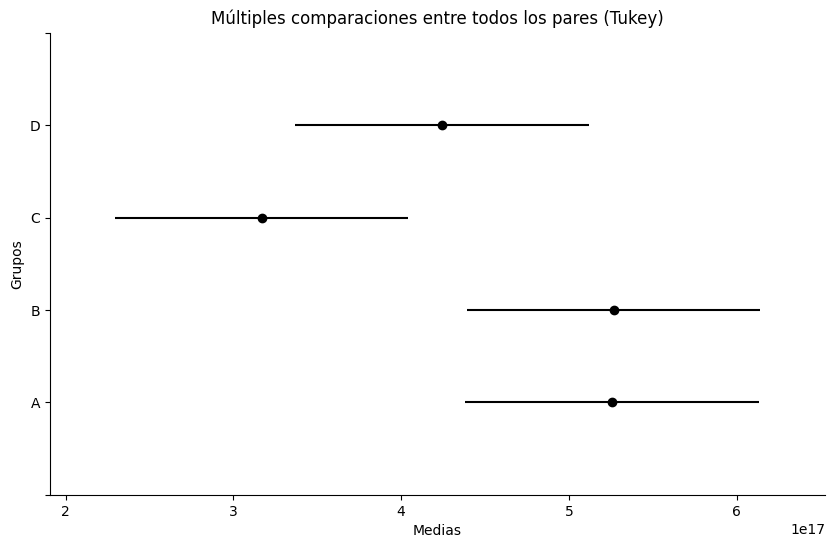

In [76]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['rendimiento_boxcox'], groups=df['maiz'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

## Problema 12
Se quieren comparar tres dietas (**A, B, C**) a base de proteínas de origen vegetal utilizando 18 ratas de laboratorio de una misma camada. Primero se observa por un tiempo el apetito para formar tres grupos de seis ratas, según su voracidad; y cada uno de estos grupos se clasifica a su vez en tres grupos de dos ratas, de acuerdo a su peso inicial. Se plantea un experimento donde la variable de respuesta es el peso en gramos ganado por las ratas después de cierto periodo, con los siguientes resultados:

| Apetito/peso inicial | A1        | A2        | A3        |
|-----------------------|-----------|-----------|-----------|
| P1                   | 67 (C)    | 105 (A)   | 95 (B)    |
|                       | 72        | 112       | 86        |
| P2                   | 85 (A)    | 75 (B)    | 88 (C)    |
|                       | 98        | 67        | 110       |
| P3                   | 66 (B)    | 68 (C)    | 108 (A)   |
|                       | 47        | 91        | 120       |

### Preguntas:
a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?  
b) ¿Cuál dieta es mejor?  
c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.  
d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.  
e) Verifique los supuestos del modelo.  


In [77]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

data = '''
dietas,apetito,pesoinicial,gramos
C,P1,A1,67
C,P1,A1,72
A,P1,A2,105
A,P1,A2,112
B,P1,A3,95
B,P1,A3,86
A,P2,A1,85
A,P2,A1,98
B,P2,A2,75
B,P2,A2,67
C,P2,A3,88
C,P2,A3,110
B,P3,A1,66
B,P3,A1,47
C,P3,A2,68
C,P3,A2,91
A,P3,A3,108
A,P3,A3,120
'''

df = pd.read_csv(StringIO(data))
df

,dietas,apetito,pesoinicial,gramos
0,C,P1,A1,67
1,C,P1,A1,72
2,A,P1,A2,105
3,A,P1,A2,112
4,B,P1,A3,95
5,B,P1,A3,86
6,A,P2,A1,85
7,A,P2,A1,98
8,B,P2,A2,75
9,B,P2,A2,67


In [78]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'gramos ~ C(dietas) + C(pesoinicial) + C(apetito)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(dietas),3216.000000,2.0,17.951286,0.000344
C(pesoinicial),2466.333333,2.0,13.766746,0.001013
C(apetito),116.333333,2.0,0.649357,0.541292
Residual,985.333333,11.0,NaN,NaN


valor-p (Shapiro) = 0.26073461350664606


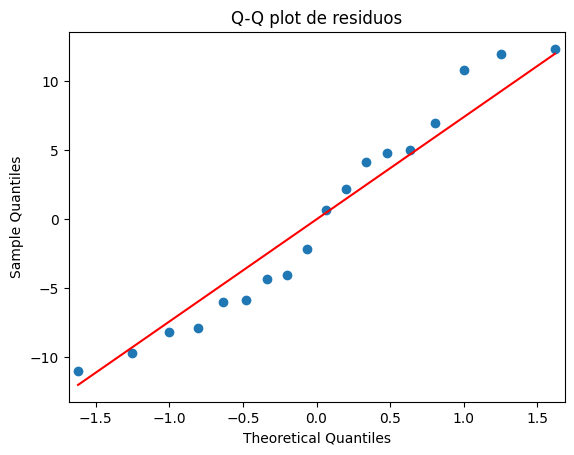

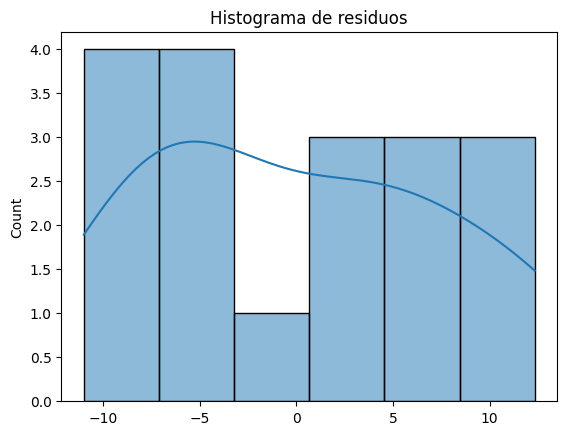

In [79]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [80]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['dietas'] == 'A']['gramos']
grupo2 = df[df['dietas'] == 'B']['gramos']
grupo3 = df[df['dietas'] == 'C']['gramos']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.5795758016998872


 Multiple Comparison of Means - Tukey HSD, FWER=0.50  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B    -32.0 0.0071 -42.2339 -21.7661   True
     A      C    -22.0 0.0634 -32.2339 -11.7661   True
     B      C     10.0 0.5152  -0.2339  20.2339  False
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

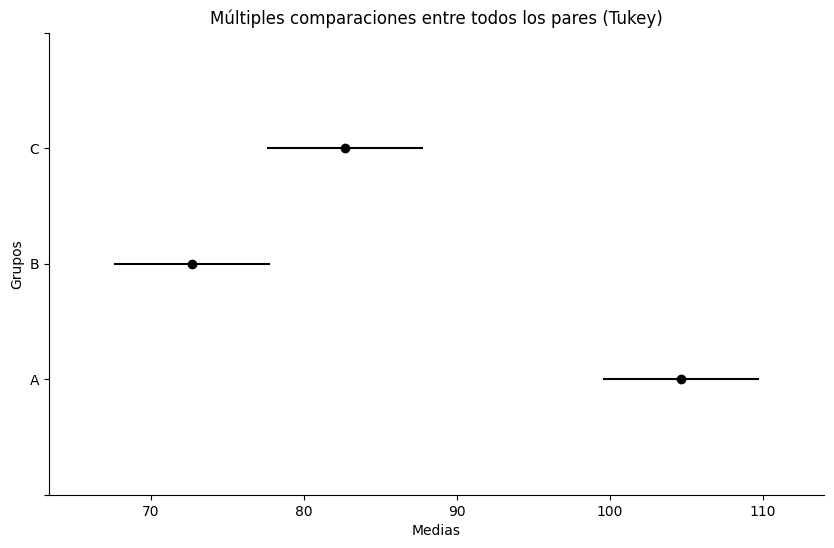

In [81]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['gramos'], groups=df['dietas'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

## Problema 13
Una compañía distribuidora ubicada en los suburbios está interesada en estudiar la diferencia en costos (tiempo y gasolina) entre las cuatro rutas (**A, B, C, D**) que llevan a la zona comercial, más importante para ellos, en el otro extremo de la ciudad. Deciden correr un experimento en cuadro grecolatino controlando los factores de bloque **chofer**, marca de vehículo (**α, β, χ, δ**) y día de la semana. El experimento se repite en dos semanas diferentes, en las cuales no hay días festivos ni quincenas. Los costos observados en pesos se muestran en la siguiente tabla:

| Chofer/día | Lunes       | Martes      | Miércoles   | Jueves      |
|------------|-------------|-------------|-------------|-------------|
| Carlos     | 825(D, α)   | 585(C, χ)   | 550(B, β)   | 580(A, δ)   |
|            | 750         | 610         | 580         | 650         |
| Enrique    | 650(A, χ)   | 540(B, α)   | 580(C, χ)   | 850(D, β)   |
|            | 725         | 560         | 635         | 770         |
| Genaro     | 700(C, β)   | 650(D, δ)   | 635(A, α)   | 450(B, χ)   |
|            | 675         | 740         | 540         | 550         |
| Luis       | 475(B, δ)   | 560(A, β)   | 650(D, α)   | 670(C, α)   |
|            | 480         | 615         | 725         | 730         |

### Preguntas:
a) Haga el análisis de varianza de este experimento.  
b) Realice las pruebas de comparaciones múltiples para los factores significativos.  
c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.  
d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?  
e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?  
f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?  
g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?  
h) Verifique los supuestos del modelo.  


In [82]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

data = '''
ruta,chofer,marca,dia,costo
D,Carlos,α,Lunes,825
D,Carlos,α,Lunes,750
C,Carlos,χ,Martes,585
C,Carlos,χ,Martes,610
B,Carlos,β,Miercoles,550
B,Carlos,β,Miercoles,580
A,Carlos,δ,Jueves,580
A,Carlos,δ,Jueves,650
A,Enrique,χ,Lunes,650
A,Enrique,χ,Lunes,725
B,Enrique,α,Martes,540
B,Enrique,α,Martes,560
D,Enrique,β,Miercoles,580
D,Enrique,β,Miercoles,635
C,Enrique,χ,Jueves,850
C,Enrique,χ,Jueves,770
C,Genaro,β,Lunes,700
C,Genaro,β,Lunes,675
D,Genaro,δ,Martes,650
D,Genaro,δ,Martes,740
A,Genaro,α,Miercoles,635
A,Genaro,α,Miercoles,540
B,Genaro,χ,Jueves,450
B,Genaro,χ,Jueves,550
B,Luis,δ,Lunes,475
B,Luis,δ,Lunes,480
A,Luis,β,Martes,560
A,Luis,β,Martes,615
D,Luis,α,Miercoles,650
D,Luis,α,Miercoles,725
C,Luis,α,Jueves,670
C,Luis,α,Jueves,730
'''

df = pd.read_csv(StringIO(data))
df

,ruta,chofer,marca,dia,costo
0,D,Carlos,α,Lunes,825
1,D,Carlos,α,Lunes,750
2,C,Carlos,χ,Martes,585
3,C,Carlos,χ,Martes,610
4,B,Carlos,β,Miercoles,550
5,B,Carlos,β,Miercoles,580
6,A,Carlos,δ,Jueves,580
7,A,Carlos,δ,Jueves,650
8,A,Enrique,χ,Lunes,650
9,A,Enrique,χ,Lunes,725


In [83]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'costo ~ C(ruta) + C(chofer) + C(marca) + C(dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(ruta),148258.649834,3.0,10.299462,0.000304
C(chofer),11995.018530,3.0,0.833289,0.492074
C(marca),10528.273665,3.0,0.731394,0.545978
C(dia),22328.024571,3.0,1.551118,0.233995
Residual,91167.038835,19.0,NaN,NaN


valor-p (Shapiro) = 0.26073461350664606


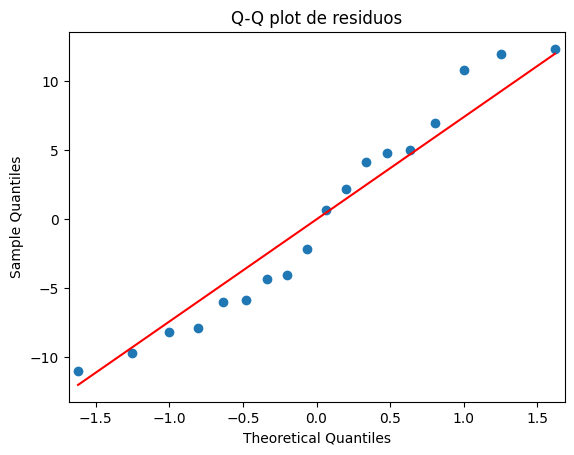

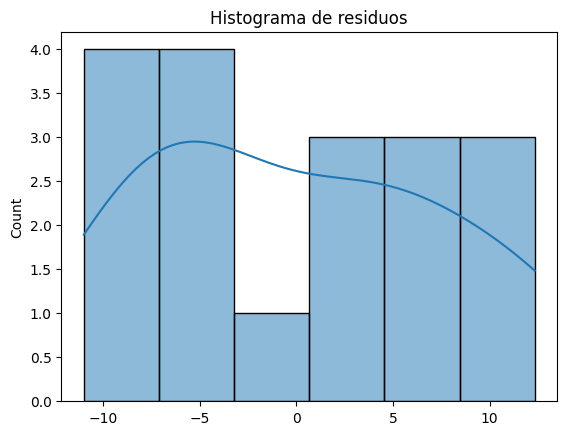

In [84]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [85]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['ruta'] == 'A']['costo']
grupo2 = df[df['ruta'] == 'B']['costo']
grupo3 = df[df['ruta'] == 'C']['costo']
grupo4 = df[df['ruta'] == 'D']['costo']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.43018358516033894


  Multiple Comparison of Means - Tukey HSD, FWER=0.50  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B   -96.25  0.046 -145.4939 -47.0061   True
     A      C   79.375 0.1263   30.1311 128.6189   True
     A      D     75.0 0.1602   25.7561 124.2439   True
     B      C  175.625 0.0001  126.3811 224.8689   True
     B      D   171.25 0.0002  122.0061 220.4939   True
     C      D   -4.375 0.9993  -53.6189  44.8689  False
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

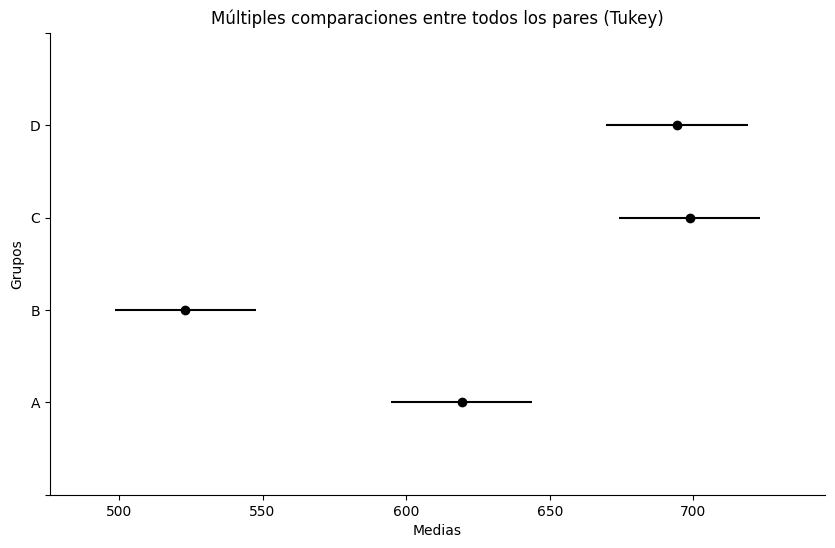

In [86]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['costo'], groups=df['ruta'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

## Problema 14
23. Un investigador está interesado en el efecto del porcentaje de lisina y del porcentaje de proteína en la producción de vacas lecheras. Se consideran siete niveles en cada factor:

- **% de lisina**: 0.0 (**A**), 0.1 (**B**), 0.2 (**C**), 0.3 (**D**), 0.4 (**E**), 0.5 (**F**), 0.6 (**G**).  
- **% de proteína**: 2 (**α**), 4 (**β**), 6 (**χ**), 8 (**δ**), 10 (**ε**), 12 (**φ**), 14 (**γ**).  

Para el estudio, se seleccionaron siete vacas al azar, a las cuales se les da un seguimiento de siete periodos de tres meses. Los datos en galones de leche fueron los siguientes:

| Vaca/periodo | 1       | 2       | 3       | 4       | 5       | 6       | 7       |
|--------------|---------|---------|---------|---------|---------|---------|---------|
| 1            | 304 (Aα)| 436 (Bε)| 350 (Cβ)| 504 (Dφ)| 417 (Eχ)| 519 (Fγ)| 432 (Gδ)|
| 2            | 381 (Bβ)| 505 (Cφ)| 425 (Dχ)| 564 (Eγ)| 487 (Fα)| 536 (Gε)| 483 (Aχ)|
| 3            | 432 (Cχ)| 566 (Dγ)| 479 (Eε)| 357 (Fα)| 466 (Gβ)| 465 (Aφ)| 507 (Bγ)|
| 4            | 442 (Dδ)| 372 (Eχ)| 536 (Fε)| 366 (Gβ)| 495 (Aχ)| 425 (Bφ)| 507 (Cγ)|
| 5            | 496 (Eε)| 449 (Fβ)| 493 (Gφ)| 345 (Aχ)| 509 (Bγ)| 481 (Cδ)| 380 (Dα)|
| 6            | 534 (Fφ)| 421 (Gχ)| 352 (Aγ)| 427 (Bδ)| 346 (Cχ)| 478 (Dε)| 397 (Eβ)|
| 7            | 543 (Gγ)| 386 (Aδ)| 435 (Bα)| 485 (Cε)| 406 (Dφ)| 554 (Eφ)| 410 (Fχ)|

### Preguntas y ejercicios:
a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?  
b) Interprete los resultados usando gráficos de medias.  
c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?  
d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?  
e) Verifique los supuestos del modelo.  


In [87]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

data = '''
lisina,proteina,vaca,periodo,produccion
A,2,1,1,304
A,4,1,2,436
C,6,1,3,350
D,10,1,4,504
E,8,1,5,417
F,12,1,6,519
G,14,1,7,432

B,4,2,1,381
C,10,2,2,505
D,8,2,3,425
E,10,2,4,564
F,10,2,5,487
G,14,2,6,536
A,6,2,7,483

C,6,3,1,432
E,12,3,2,566
E,8,3,3,479
F,12,3,4,357
F,4,3,5,466
A,12,3,6,465
B,4,3,7,507

D,8,4,1,442
D,4,4,2,372
F,12,4,3,536
G,14,4,4,366
A,8,4,5,495
B,4,4,6,425
C,6,4,7,507

E,10,5,1,496
E,4,5,2,449
G,14,5,3,493
A,6,5,4,345
F,10,5,5,509
C,6,5,6,481
D,8,5,7,380

F,12,6,1,534
C,4,6,2,421
A,6,6,3,352
B,4,6,4,427
C,4,6,5,346
D,8,6,6,478
E,4,6,7,397

G,14,7,1,543
B,4,7,2,386
B,4,7,3,435
C,10,7,4,485
E,8,7,5,406
F,12,7,6,554
F,10,7,7,410
'''

df = pd.read_csv(StringIO(data))
df

,lisina,proteina,vaca,periodo,produccion
0,A,2,1,1,304
1,A,4,1,2,436
2,C,6,1,3,350
3,D,10,1,4,504
4,E,8,1,5,417
5,F,12,1,6,519
6,G,14,1,7,432
7,B,4,2,1,381
8,C,10,2,2,505
9,D,8,2,3,425


In [88]:
#Mily Díaz de León Márquez
#Tabla ANOVA
from statsmodels.formula.api import ols
import statsmodels.api as sm

modelo_lineal = ols('produccion ~ C(lisina) + C(proteina) + C(vaca) + C(periodo)', data=df).fit()
anova = sm.stats.anova_lm(modelo, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(ruta),148258.649834,3.0,10.299462,0.000304
C(chofer),11995.018530,3.0,0.833289,0.492074
C(marca),10528.273665,3.0,0.731394,0.545978
C(dia),22328.024571,3.0,1.551118,0.233995
Residual,91167.038835,19.0,NaN,NaN


valor-p (Shapiro) = 0.08963680448593221


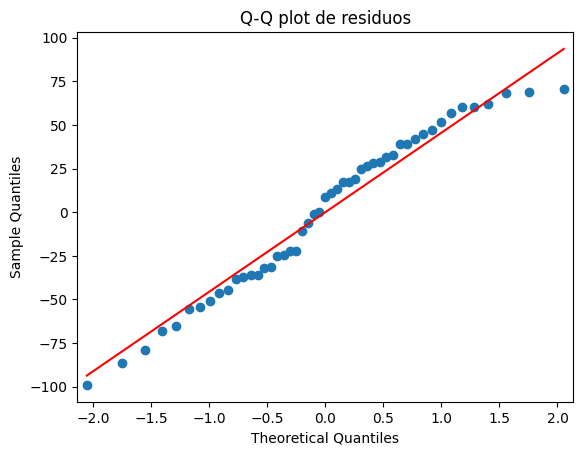

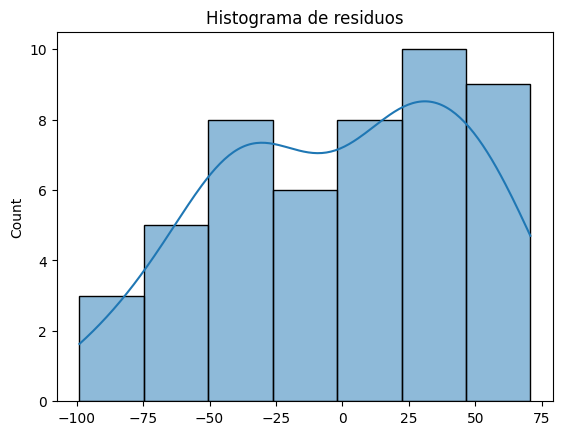

In [89]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

 Multiple Comparison of Means - Tukey HSD, FWER=0.50  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B  15.4048 0.9995 -52.6528  83.4623  False
     A      C  29.4464  0.974 -33.8648  92.7577  False
     A      D  22.0714 0.9961 -45.9861   90.129  False
     A      E  60.3214  0.557  -2.9898 123.6327  False
     A      F  74.3492 0.2796  12.7012 135.9972   True
     A      G  62.5714 0.6528  -9.0571 134.1999  False
     B      C  14.0417 0.9996 -52.0235  80.1068  False
     B      D   6.6667    1.0   -63.96  77.2933  False
     B      E  44.9167 0.8559 -21.1485 110.9818  False
     B      F  58.9444 0.6038  -5.5286 123.4174  False
     B      G  47.1667 0.8897 -26.9072 121.2405  False
     C      D   -7.375    1.0 -73.4402  58.6902  False
     C      E   30.875 0.9613 -30.2895  92.0395  False
     C      F  44.9028 0.7852 -14.5384 104.3439  False
     C      G   33.125 0.9712 -36.6132 102.8632  False
     D    

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

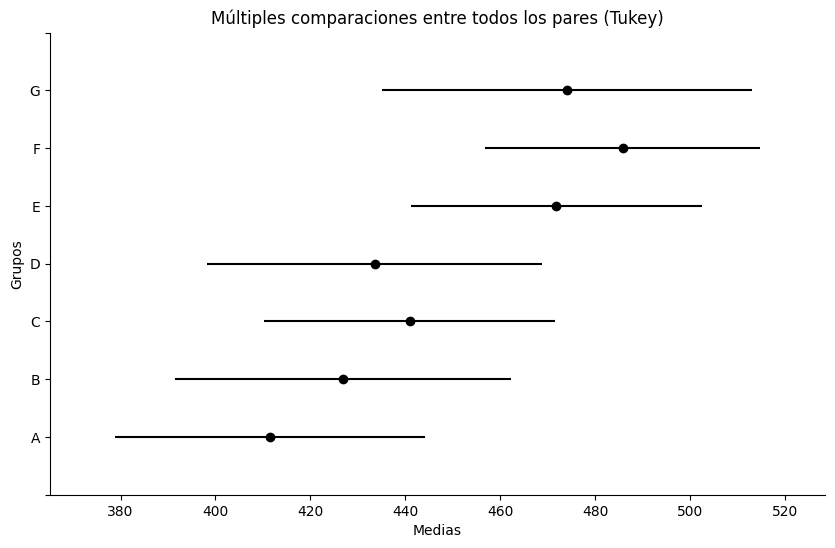

In [90]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['produccion'], groups=df['lisina'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

**Conclusión General:**

A lo largo del desarrollo de este trabajo se aplicaron diversos diseños experimentales incluyendo diseños en bloques completamente al azar (DBCA), cuadros latinos y diseños grecolatinos con el fin de analizar múltiples situaciones reales donde intervienen factores de tratamiento y factores de bloqueo. El análisis de varianza (ANOVA) fue la herramienta central para evaluar la existencia de diferencias significativas entre tratamientos, así como para determinar la influencia de los factores de bloqueo en la variabilidad total de cada experimento.
Los resultados muestran que, en la mayoría de los casos, los factores de tratamiento sí presentan diferencias significativas, lo cual permite identificar opciones superiores o inferiores según el contexto (como detergentes, catalizadores, equipos de medición, variedades de maíz, dietas o rutas de transporte). En contraste, varios factores de bloqueo no resultaron significativos, lo cual justificó su eliminación en algunos modelos sin alterar las conclusiones principales, reforzando la importancia de incluir bloques únicamente cuando estos aportan reducción real de la variabilidad experimental.
Además, se verificaron de manera sistemática los supuestos estadísticos necesarios para la validez del ANOVA: normalidad de residuos, homogeneidad de varianzas y ausencia de valores aberrantes. En los pocos casos donde los supuestos no se cumplieron inicialmente, se aplicaron transformaciones como Box–Cox, las cuales corrigieron adecuadamente la distribución y permitieron continuar con las inferencias estadísticas.
En conjunto, este problemario permitió comprender de forma práctica cómo los diseños experimentales avanzados contribuyen a mejorar la precisión de las conclusiones, a minimizar la variabilidad no explicada y a interpretar correctamente los efectos de los factores estudiados. Con ello, se reafirma la importancia de elegir el diseño experimental adecuado según las características del problema, así como de realizar un análisis riguroso que garantice la confiabilidad de los resultados obtenidos.